In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('tourist_crowd_data.csv')

# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['District', 'Season', 'Month'], drop_first=True)

# Split the dataset into features (X) and target (y)
X = data.drop('CrowdCount', axis=1)
y = data['CrowdCount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 2023179.8914504147
R-squared (R2) Score: -0.014898439291363808


In [12]:
import matplotlib.pyplot as plt

# Choose a specific district, season, and year
district = input()
season = input()
year = 2023

# Filter the data for the selected district, season, and year
selected_data = data[(data['District'] == district) & (data['Season'] == season) & (data['Year'] == year)]

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(selected_data['Month'], selected_data['CrowdCount'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Crowd Count')
plt.title(f'Crowd Count in {district} - {season} {year}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


 Hampi - Virupaksha Temple
 Summer


KeyError: 'District'

In [13]:
import matplotlib.pyplot as plt

# Create a scatter plot for district vs. crowd count
plt.figure(figsize=(12, 6))
plt.scatter(data['District'], data['CrowdCount'], alpha=0.5)
plt.xlabel('District')
plt.ylabel('Crowd Count')
plt.title('District vs. Crowd Count Scatter Plot')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


KeyError: 'District'

<Figure size 1200x600 with 0 Axes>

In [14]:
import pandas as pd
import random

# Define regions and seasons
regions = ["Himalayas", "Beaches", "Deserts", "Hill Stations", "Historical Sites"]
seasons = ["Summer", "Monsoon", "Winter", "Spring"]

# Generate 1000 random records
data = {
    "Region": [random.choice(regions) for _ in range(1000)],
    "Season": [random.choice(seasons) for _ in range(1000)],
    "Month": [random.randint(1, 12) for _ in range(1000)],
    "CrowdCount": [random.randint(1, 10000) for _ in range(1000)],
}

df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv("tourist_data.csv", index=False)


In [15]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=["Region", "Season"])


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop("CrowdCount", axis=1)
y = df["CrowdCount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


ValueError: could not convert string to float: 'Cloudy'

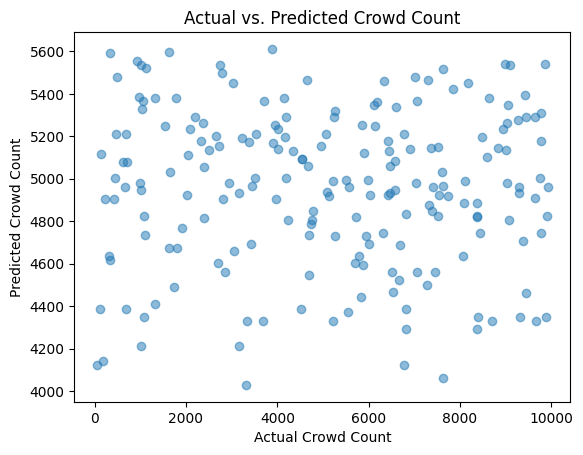

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Crowd Count")
plt.ylabel("Predicted Crowd Count")
plt.title("Actual vs. Predicted Crowd Count")
plt.show()


In [21]:
# app.py

from flask import Flask, request, render_template
import pandas as pd
from sklearn.linear_model import LinearRegression

app = Flask(__name)

# Load the trained model and preprocessed data
model = LinearRegression()
data = pd.read_csv("tourist_data.csv")
X = data.drop("CrowdCount", axis=1)
y = data["CrowdCount"]
model.fit(X, y)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        region = request.form['region']
        season = request.form['season']
        month = int(request.form['month'])

        # Perform one-hot encoding
        regions = ["Himalayas", "Beaches", "Deserts", "Hill Stations", "Historical Sites"]
        seasons = ["Summer", "Monsoon", "Winter", "Spring"]
        region_encoded = [1 if r == region else 0 for r in regions]
        season_encoded = [1 if s == season else 0 for s in seasons]

        input_data = [month] + region_encoded + season_encoded
        crowd_prediction = model.predict([input_data])

        return render_template('index.html', prediction=f'Predicted Crowd Count: {int(crowd_prediction[0])}')

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'flask'

In [24]:
!pip install flask



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import flask
print(flask.__version__)


ModuleNotFoundError: No module named 'flask'

In [26]:
flask --version

NameError: name 'flask' is not defined

In [27]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [28]:
%%cmd
python.exe -m pip install --upgrade pip

Microsoft Windows [Version 10.0.22635.2486]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Kunal Mukherjee>python.exe -m pip install --upgrade pip
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\python312\\lib\\site-packages\\pip-23.2.1.dist-info\\AUTHORS.txt'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



C:\Users\Kunal Mukherjee>

In [29]:
pip install --user flask


   ---------------------------------------- 0.0/99.7 kB ? eta -:--:--
   -------------------------------- ------- 81.9/99.7 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 99.7/99.7 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/226.7 kB ? eta -:--:--
   ------------------- -------------------- 112.6/226.7 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------  225.3/226.7 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 226.7/226.7 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [33]:
import matplotlib.pyplot as plt

# Get the unique districts from the dataset
unique_districts = data['District'].unique()

# Create a scatter plot for each district
for district in unique_districts:
    plt.figure(figsize=(12, 6))
    district_data = data[data['District'] == district]
    plt.scatter(district_data['District'], district_data['CrowdCount'], alpha=0.5)
    plt.xlabel('District')
    plt.ylabel('Crowd Count')
    plt.title(f'{district} - Crowd Count Scatter Plot')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


KeyError: 'District'

In [ ]:
tourist_destinations = ["Agra - Taj Mahal", "Jaipur - Amber Fort", "Goa - Beaches", "Kerala - Backwaters", "Delhi - Red Fort", "Mumbai - Gateway of India", "Varanasi - Ganges River Ghats", "Udaipur - City Palace", "Rajasthan - Thar Desert", "Darjeeling - Tea Gardens", "Amritsar - Golden Temple", "Mysore - Mysore Palace", "Shimla - Mall Road", "Leh-Ladakh - Pangong Lake", "Kolkata - Victoria Memorial", "Chennai - Marina Beach", "Hyderabad - Charminar", "Kochi - Fort Kochi", "Jaisalmer - Jaisalmer Fort", "Rishikesh - Ganges River Rafting", "Khajuraho - Khajuraho Temples", "Aurangabad - Ajanta and Ellora Caves", "Puducherry - French Quarter", "Gangtok - Tsomgo Lake", "Auli - Ski Resort", "Ooty - Nilgiri Mountain Railway", "Bengaluru - Lalbagh Botanical Garden", "Manali - Rohtang Pass", "Haridwar - Har Ki Pauri", "Madurai - Meenakshi Temple", "Hampi - Hampi Ruins", "Rann of Kutch - White Desert", "Kasol - Parvati Valley", "Pushkar - Pushkar Lake", "Pune - Shaniwar Wada", "Ladakh - Khardung La", "Jodhpur - Mehrangarh Fort", "Munnar - Tea Plantations", "Khajuraho - Khajuraho Temples", "Ajmer - Ajmer Sharif Dargah", "Varkala - Varkala Beach", "Rajgir - Vulture Peak", "Kanyakumari - Vivekananda Rock Memorial", "Nainital - Naini Lake", "Tirupati - Tirumala Venkateswara Temple", "Mahabalipuram - Shore Temple", "Rameswaram - Ramanathaswamy Temple", "Kanchipuram - Kanchi Kailasanathar Temple", "Bodh Gaya - Mahabodhi Temple", "Ranikhet - Bhalu Dam", "Kodaikanal - Kodaikanal Lake", "Aurangabad - Bibi Ka Maqbara", "Nalanda - Nalanda University Ruins", "Konark - Sun Temple", "Tiruvannamalai - Arunachaleswarar Temple", "Agra - Agra Fort", "Jaisalmer - Sam Sand Dunes", "Udaipur - Lake Pichola", "Rajasthan - Pushkar Camel Fair", "Mumbai - Elephanta Caves", "Bikaner - Junagarh Fort", "Chandigarh - Rock Garden", "Srinagar - Dal Lake", "Shillong - Umiam Lake", "Guwahati - Kamakhya Temple", "Bhutan - Paro Taktsang (Tiger's Nest)", "Leh - Leh Palace", "Kashmir - Gulmarg", "Mysore - Brindavan Gardens", "Puducherry - Auroville", "Rameswaram - Dhanushkodi", "Karnataka - Badami Caves", "Taj Mahal - Fatehpur Sikri", "Chennai - Kapaleeshwarar Temple", "Kovalam - Kovalam Beach", "Nagpur - Deekshabhoomi", "Vrindavan - Banke Bihari Temple", "Dharamshala - McLeod Ganj", "Sikkim - Rumtek Monastery", "Mandawa - Mandawa Fort", "Hampi - Virupaksha Temple", "Pune - Sinhagad Fort", "Leh-Ladakh - Nubra Valley", "Udaipur - Jag Mandir", "Munnar - Anamudi", "Kerala - Kumarakom", "Varanasi - Sarnath", "Bhubaneswar - Lingaraj Temple", "Ajmer - Taragarh Fort", "Dwarka - Dwarkadhish Temple", "Jaipur - City Palace", "Hampi - Elephant Stables", "Amritsar - Wagah Border", "Ooty - Rose Garden", "Darjeeling - Darjeeling Himalayan Railway", "Manali - Solang Valley", "Kasol - Kheerganga Trek", "Bodh Gaya - Mahabodhi Tree", "Mysore - Chamundi Hill", "Shillong - Shillong Peak", "Kolkata - Howrah Bridge", "Sikkim - Tsongmo Lake", "Pondicherry - Promenade Beach", "Nagaland - Hornbill Festival", "Delhi - India Gate"]


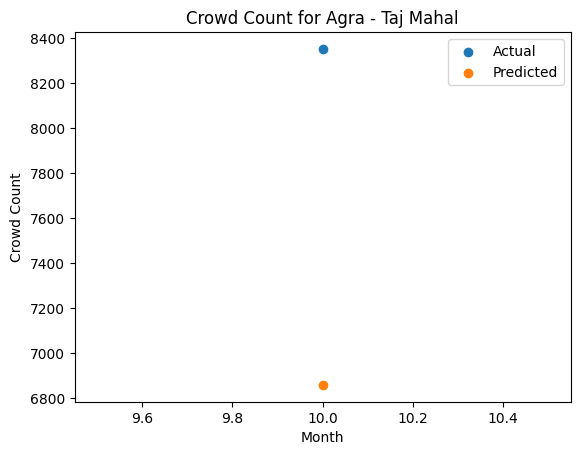

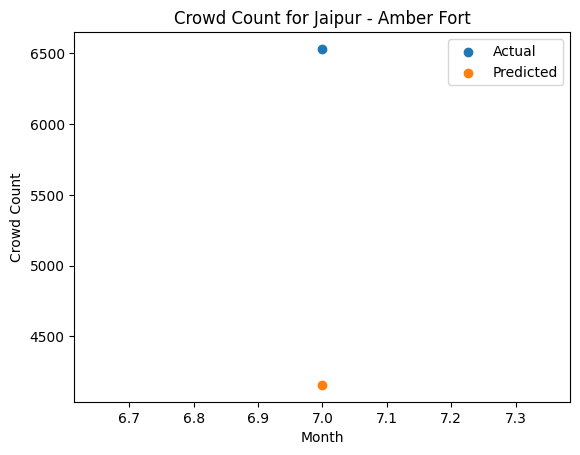

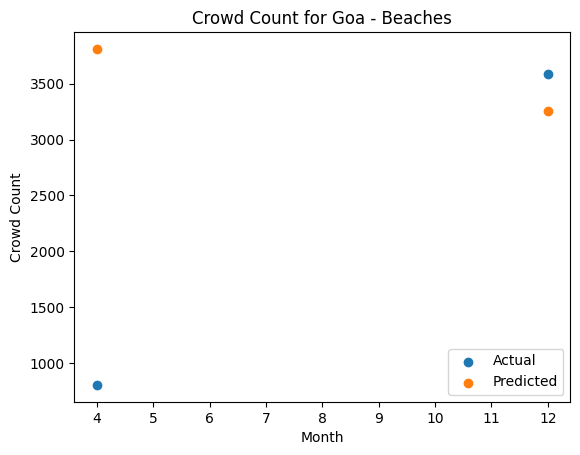

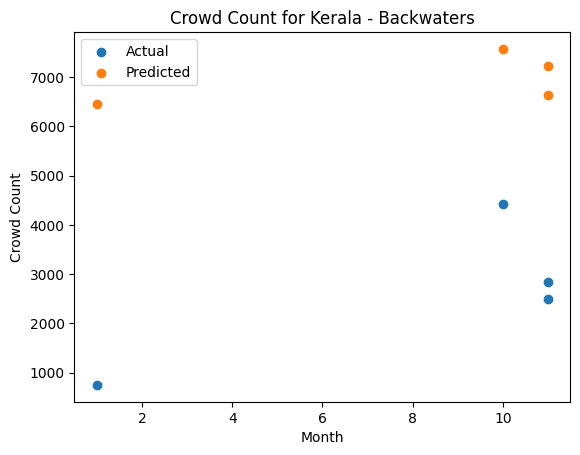

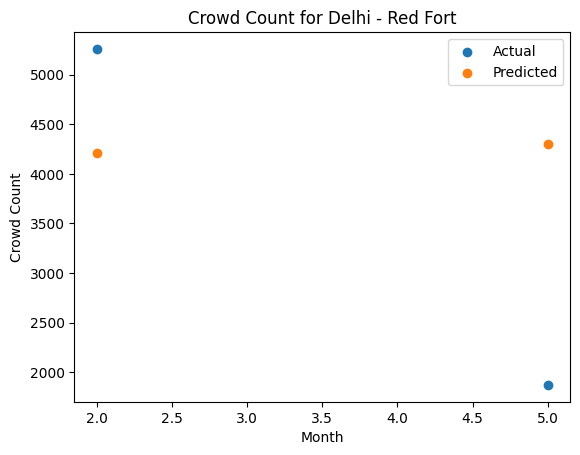

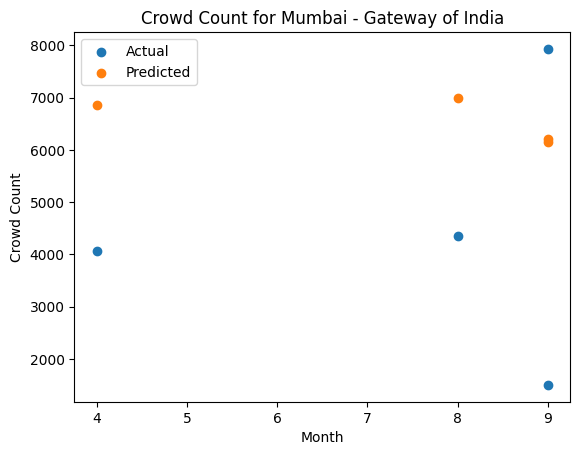

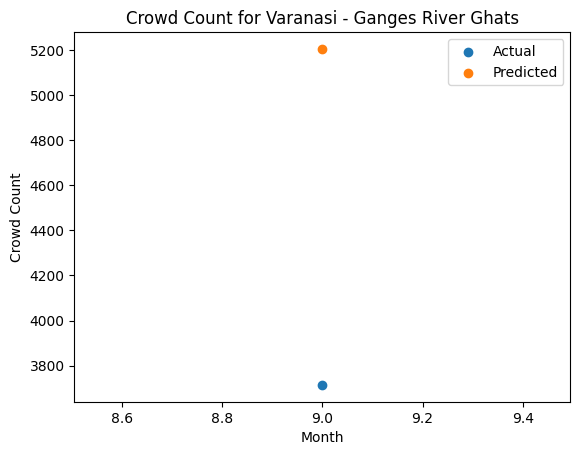

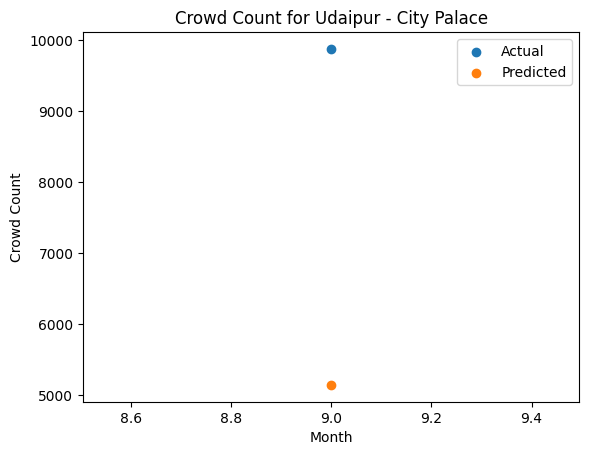

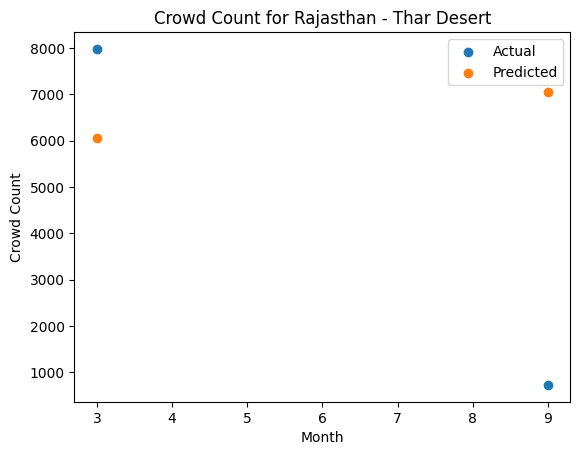

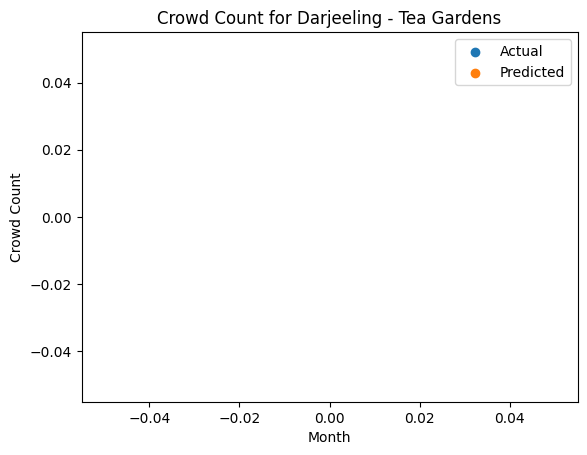

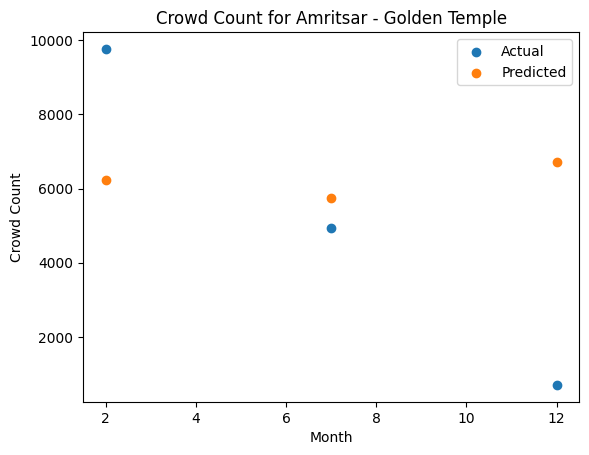

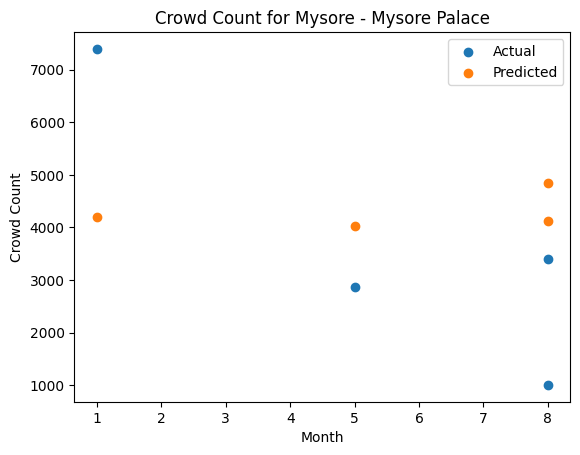

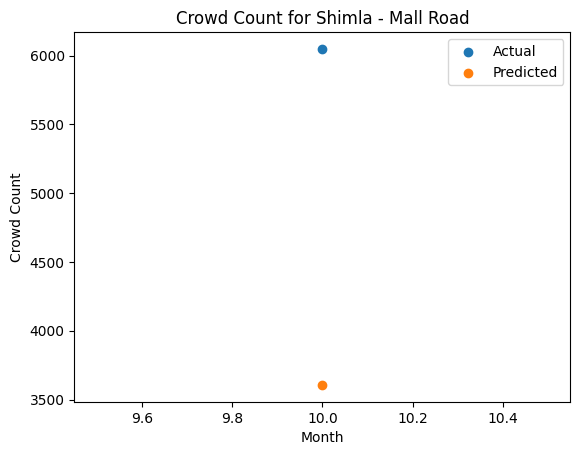

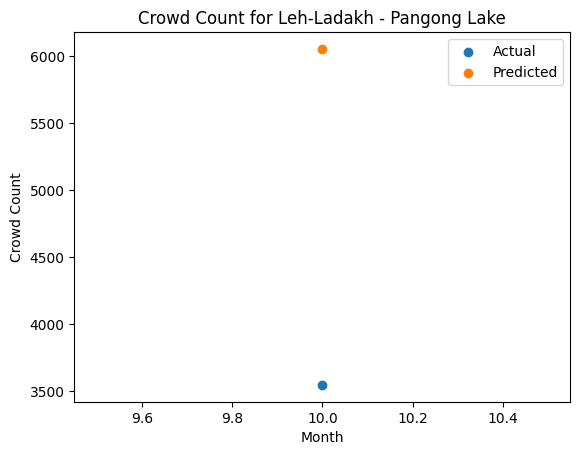

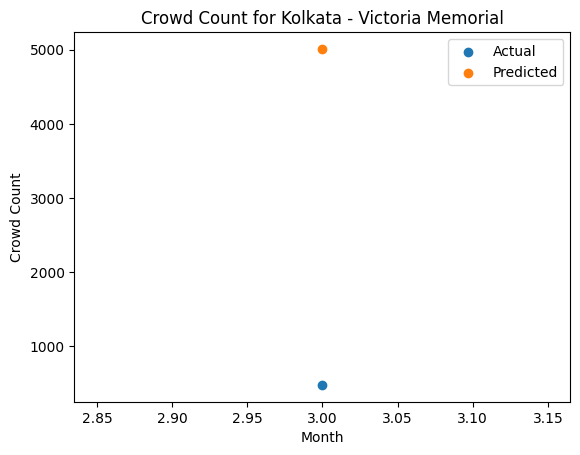

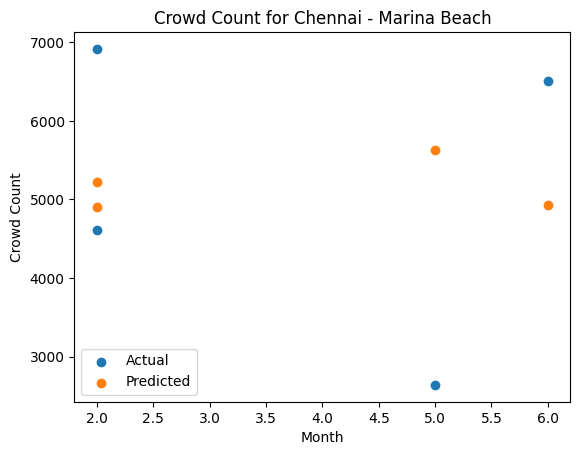

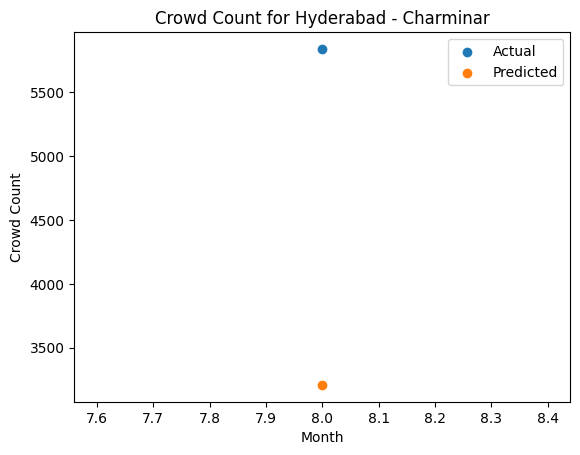

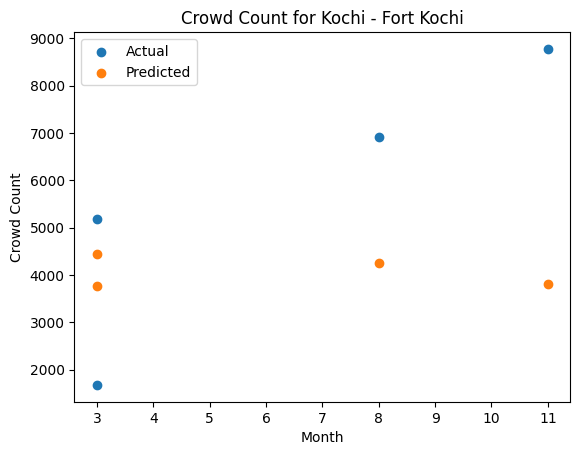

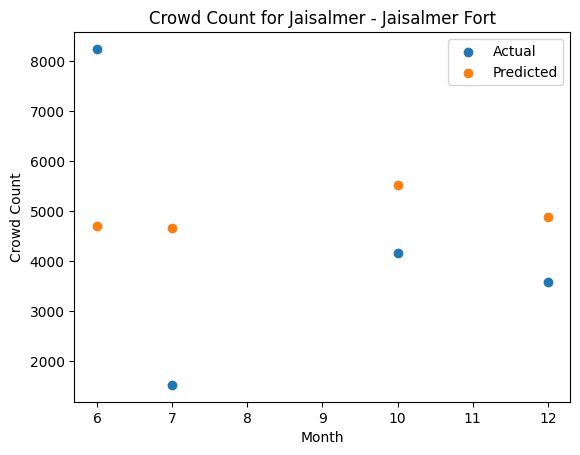

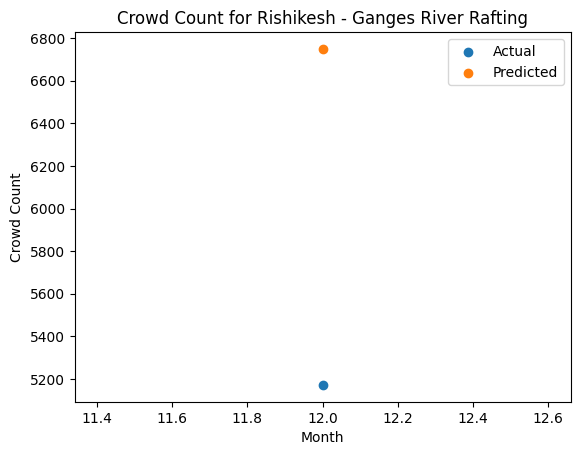

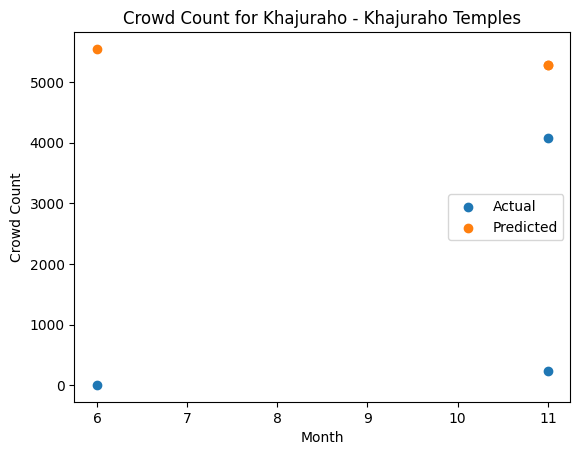

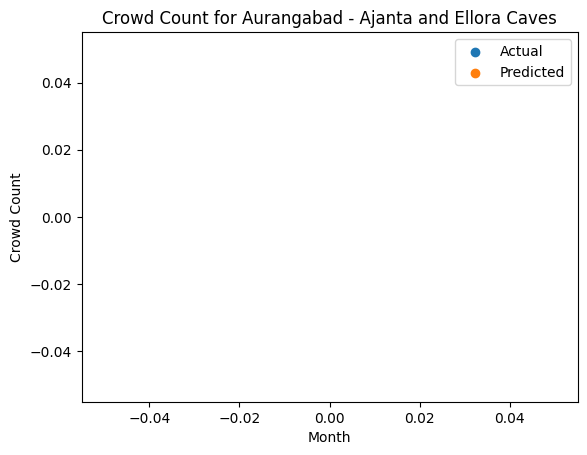

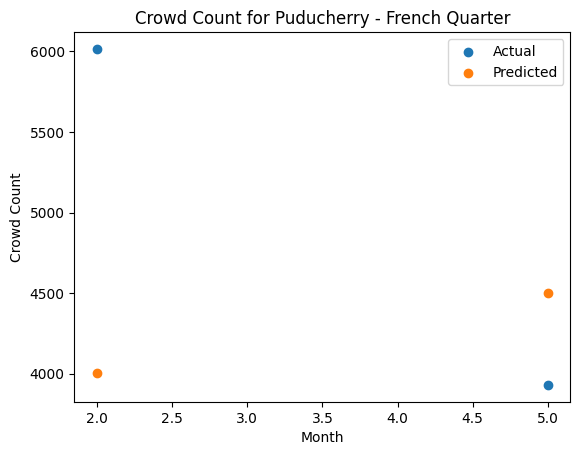

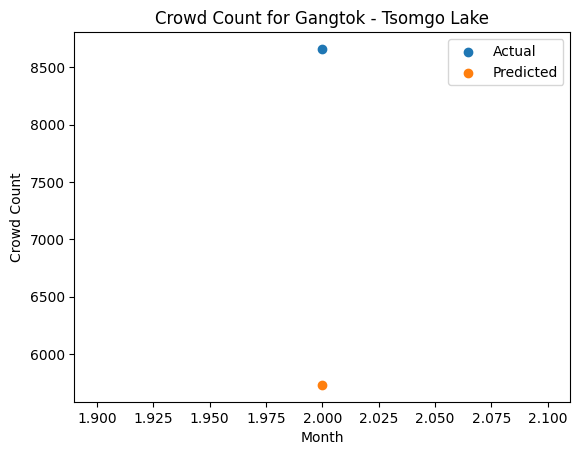

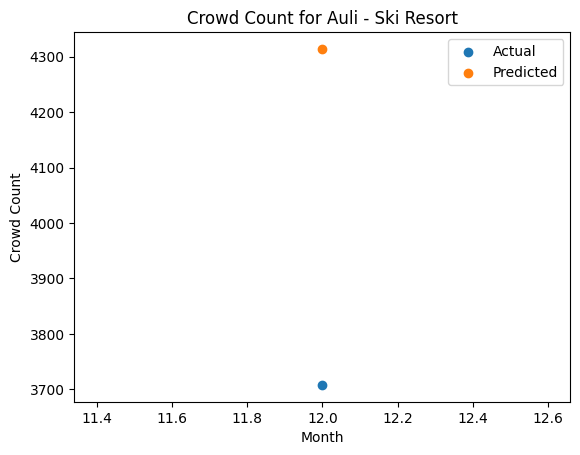

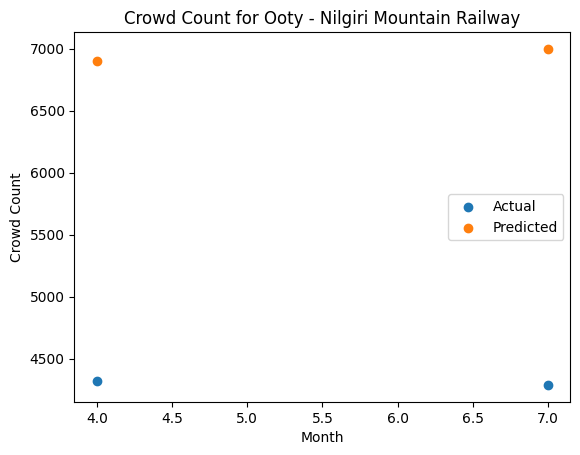

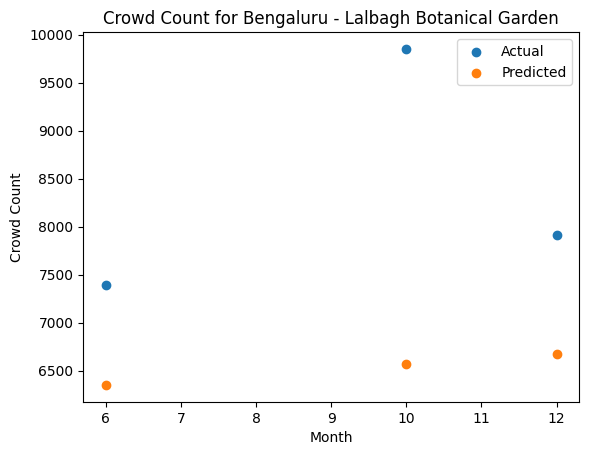

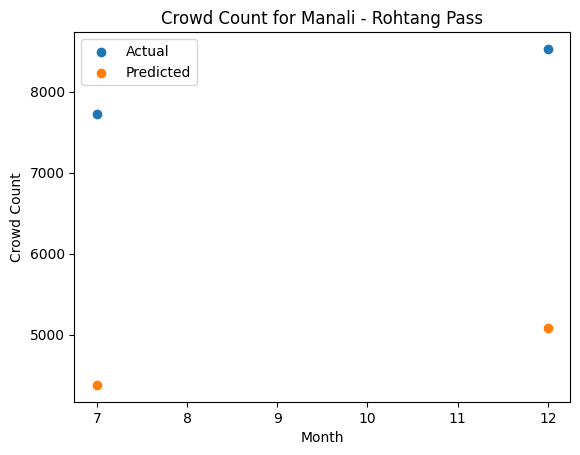

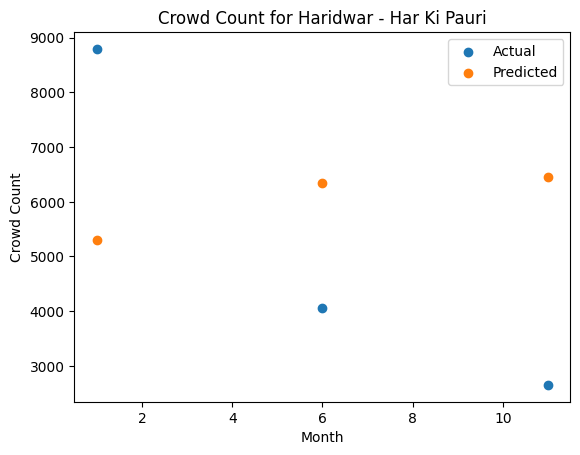

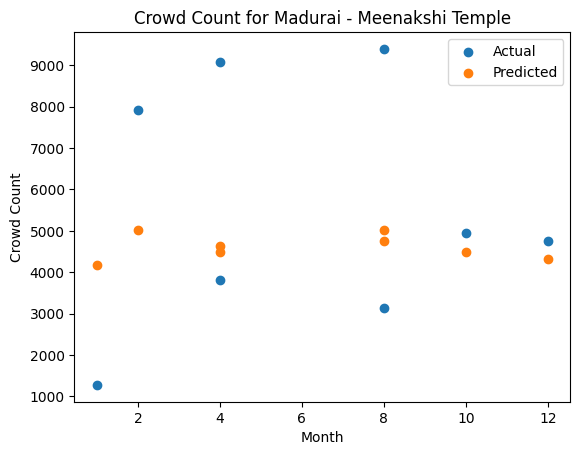

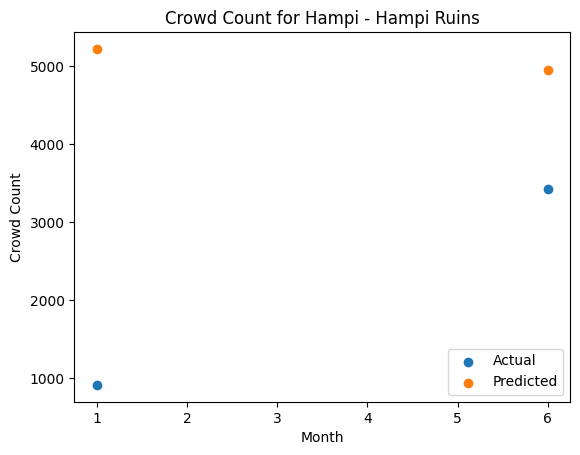

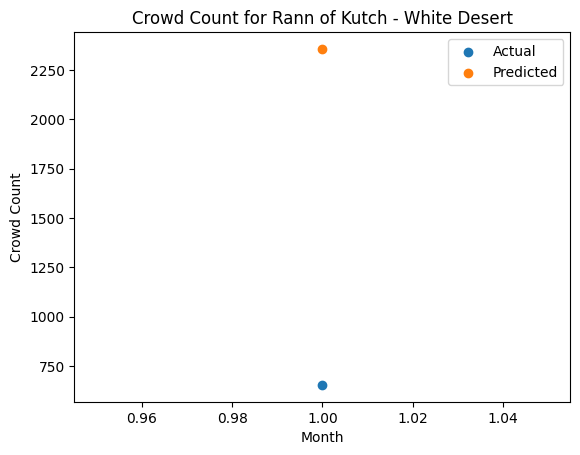

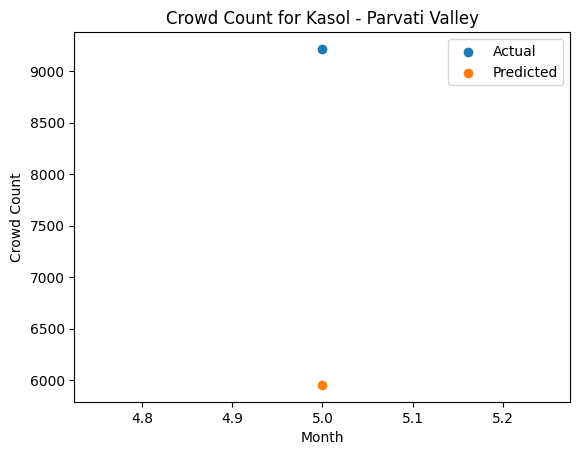

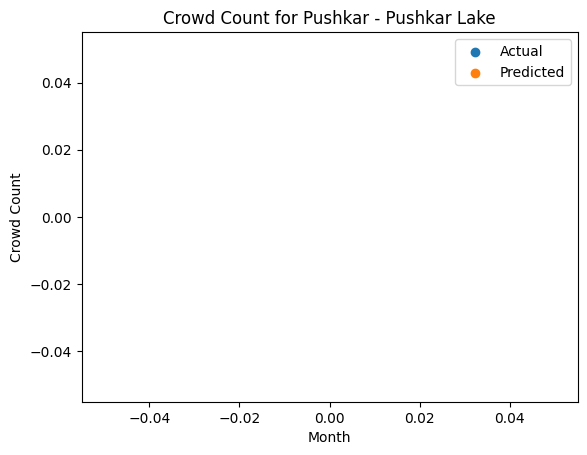

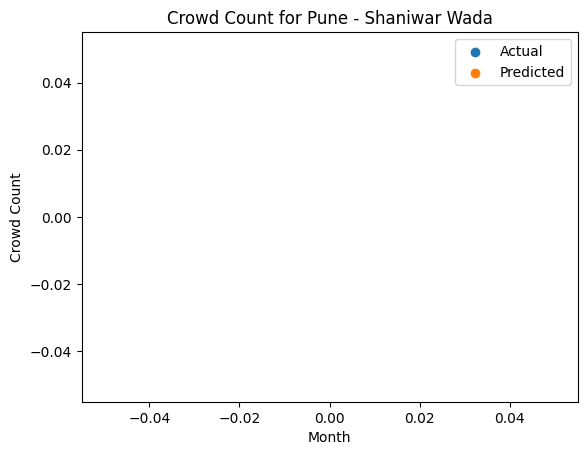

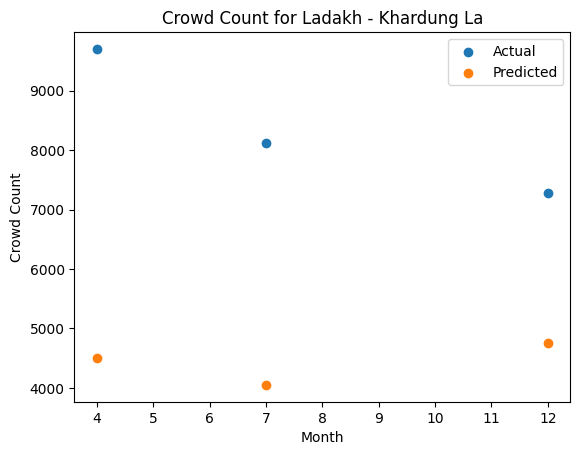

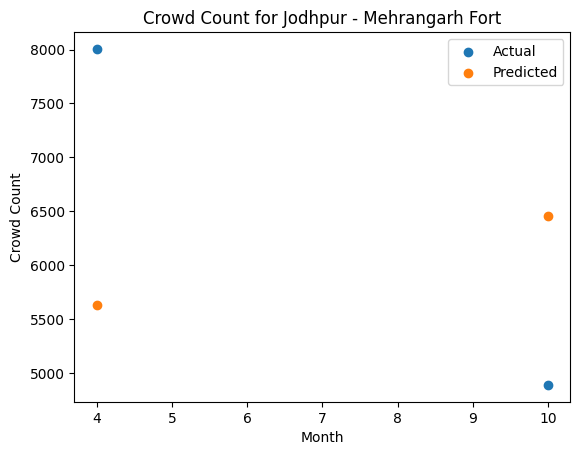

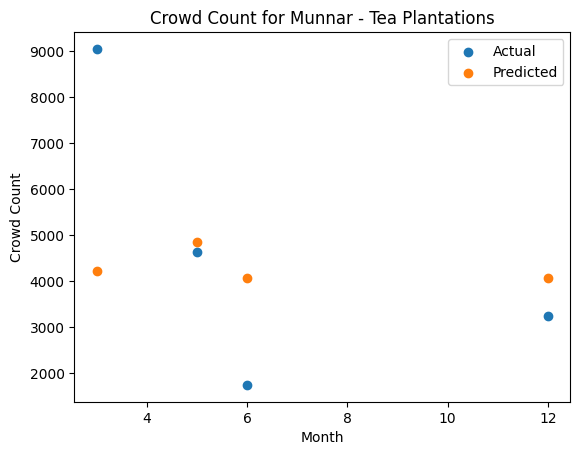

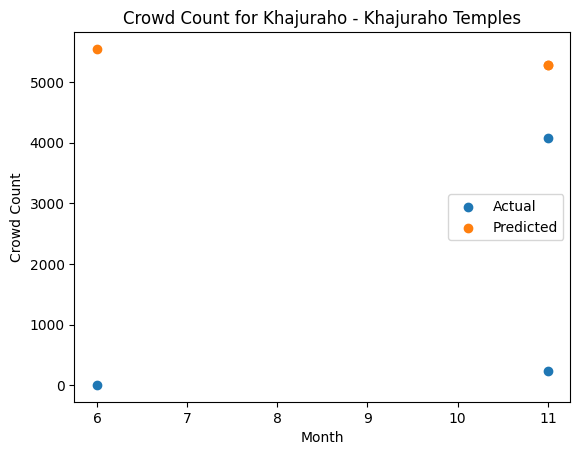

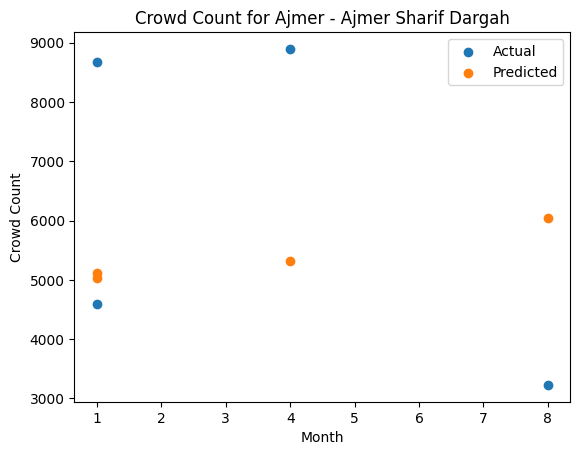

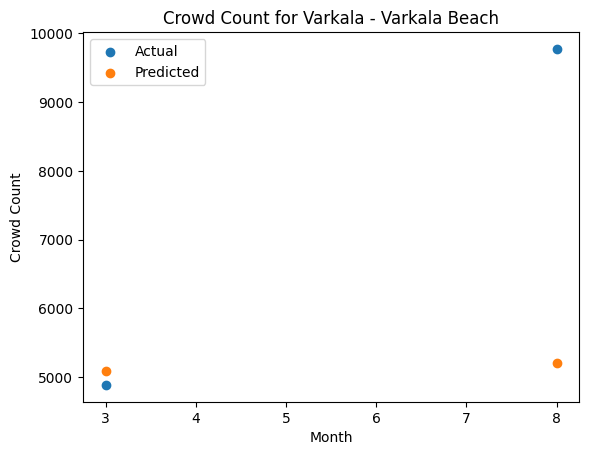

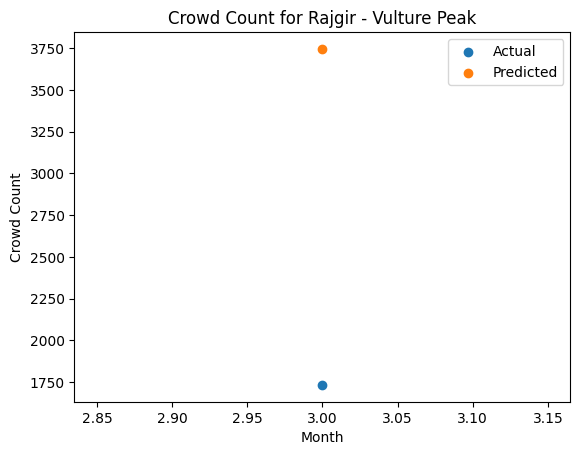

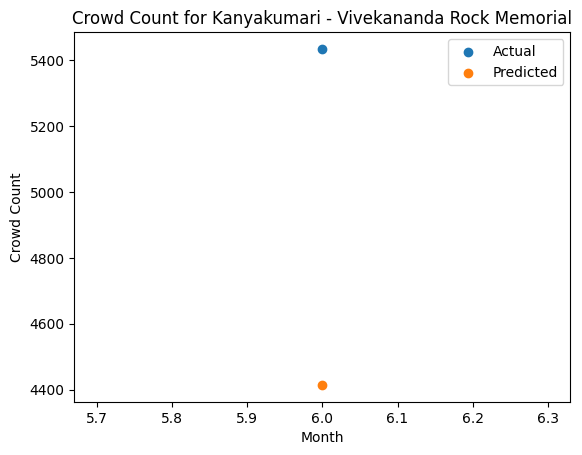

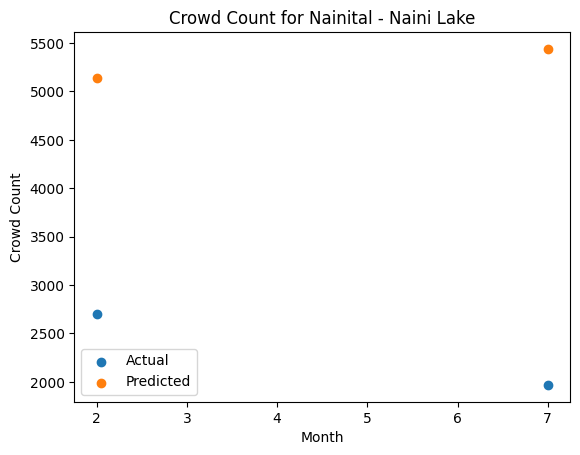

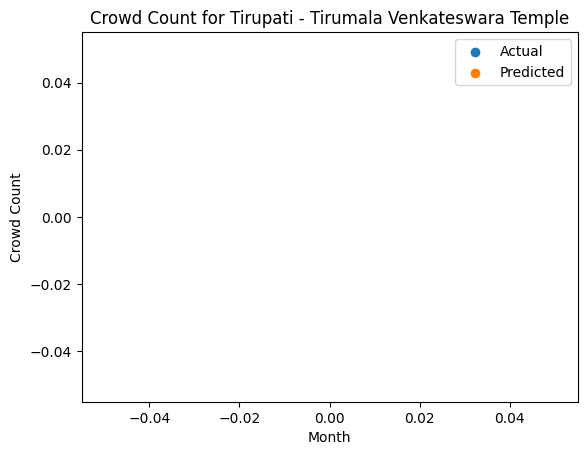

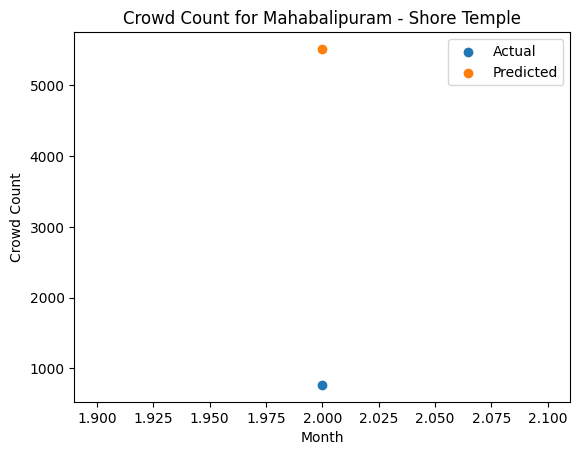

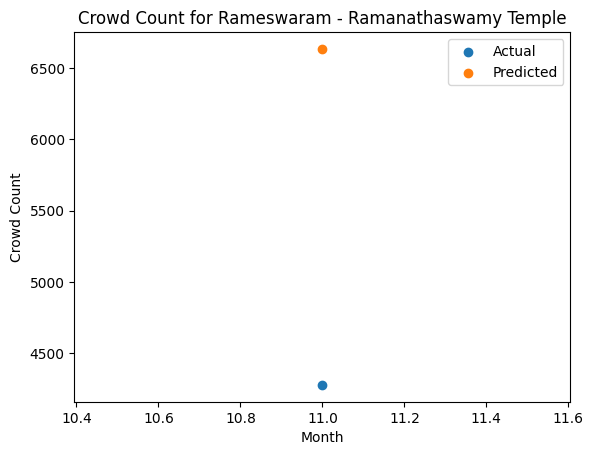

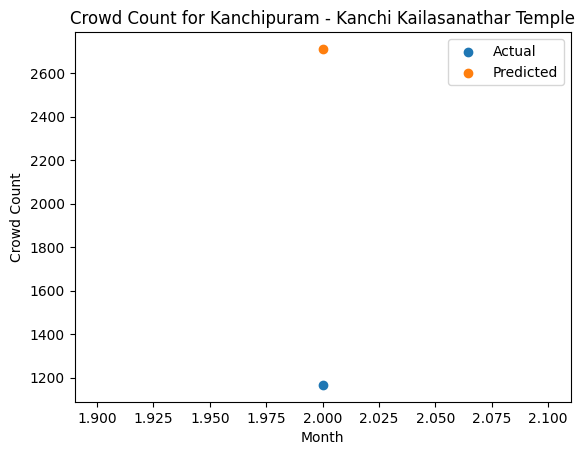

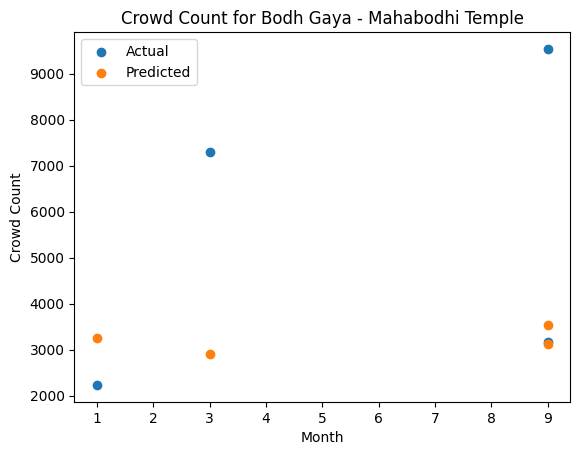

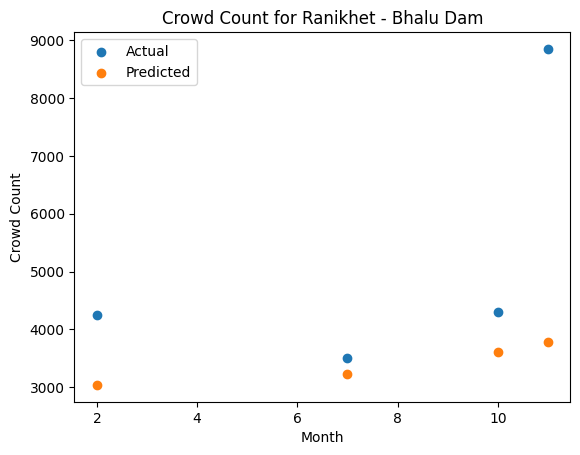

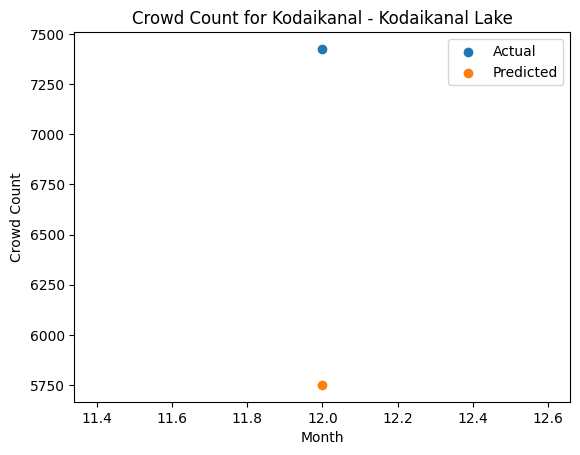

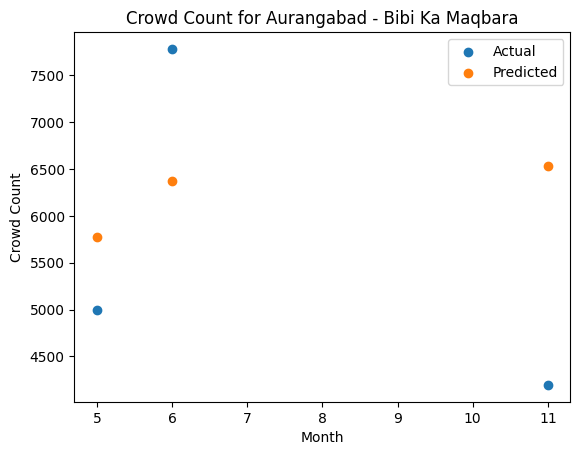

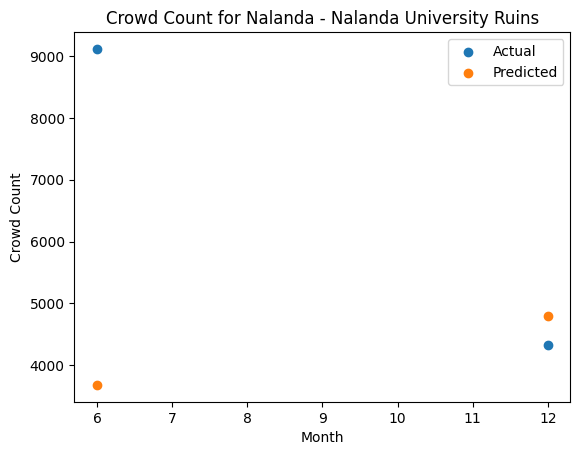

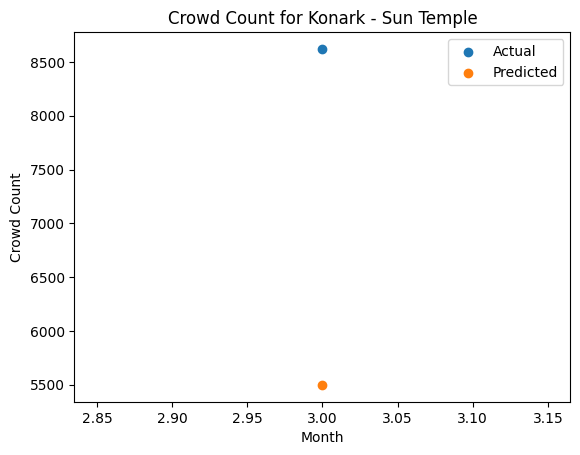

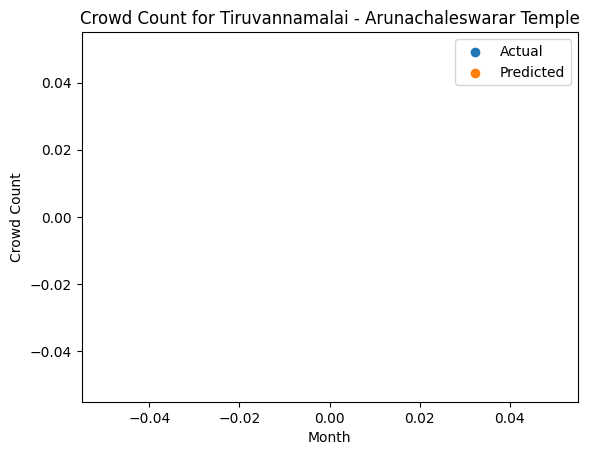

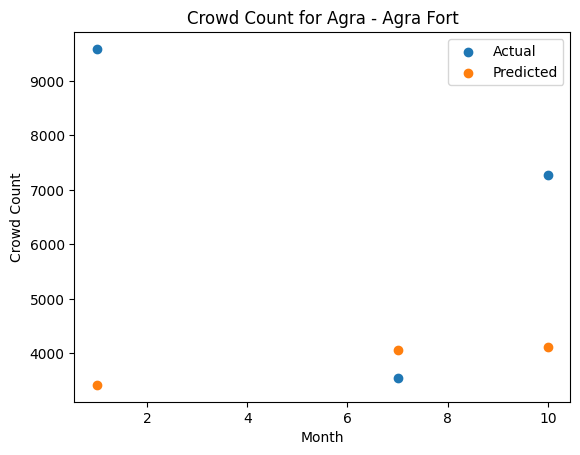

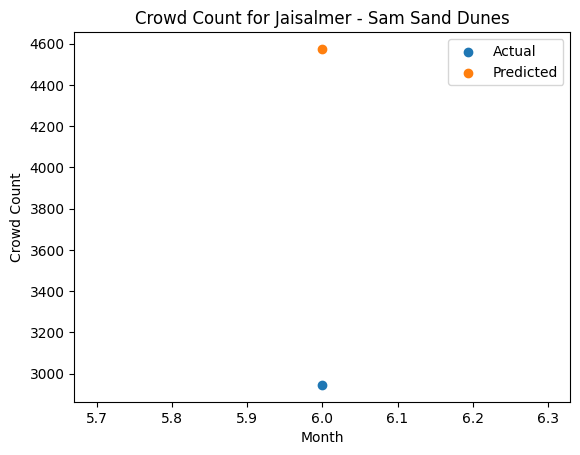

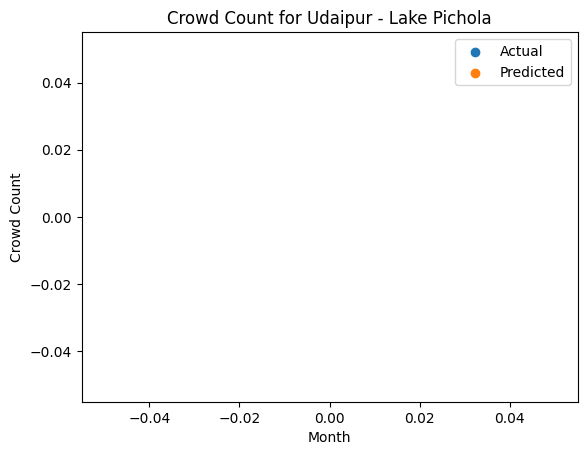

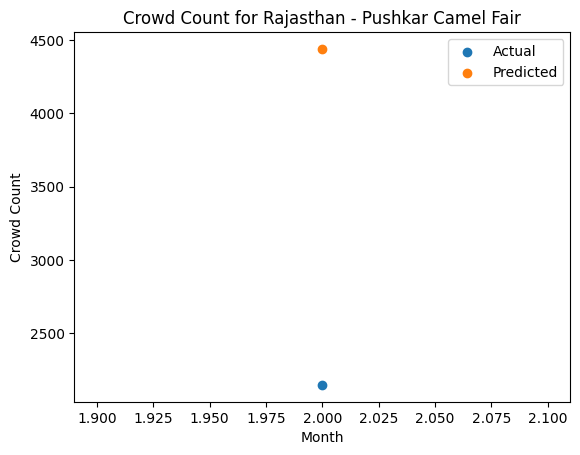

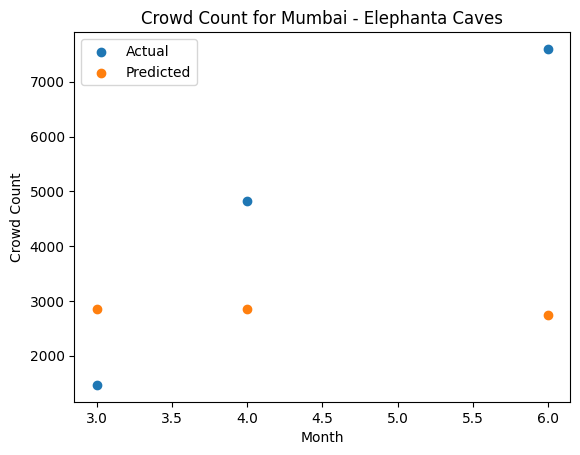

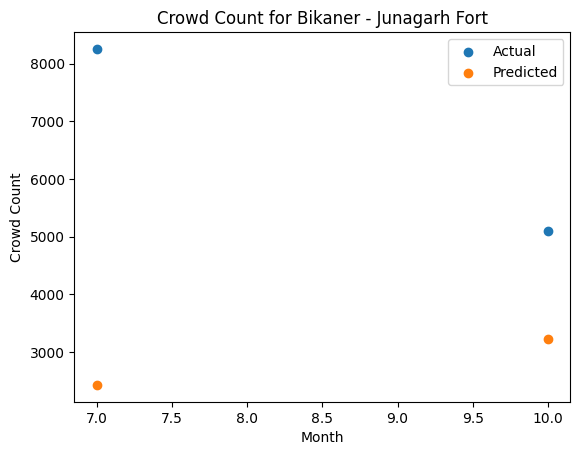

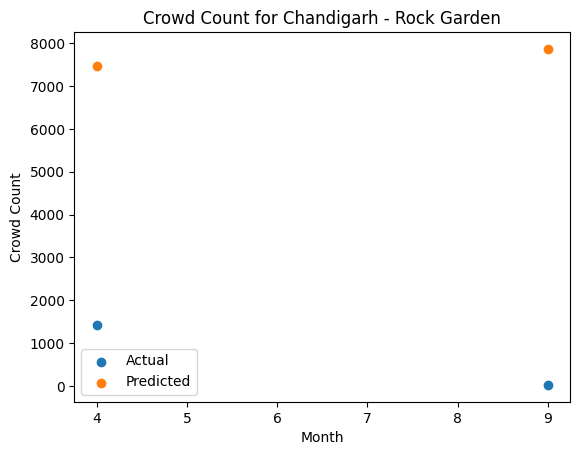

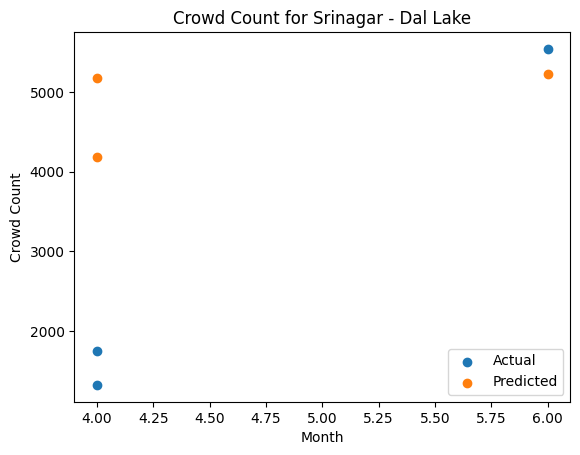

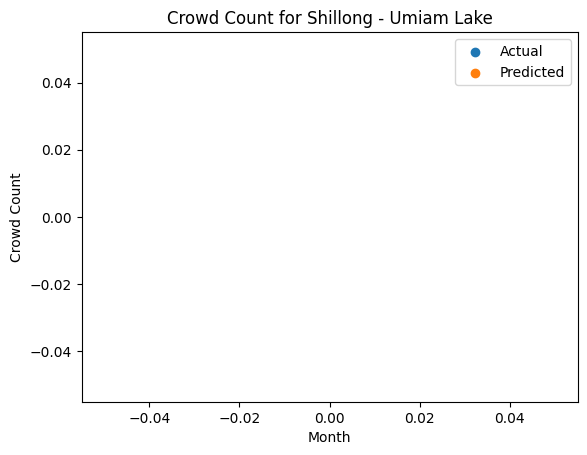

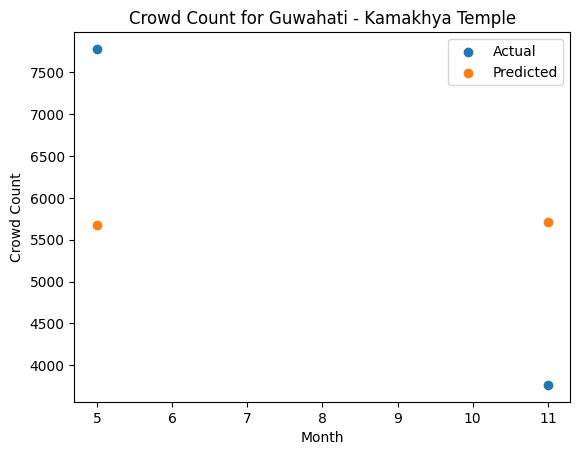

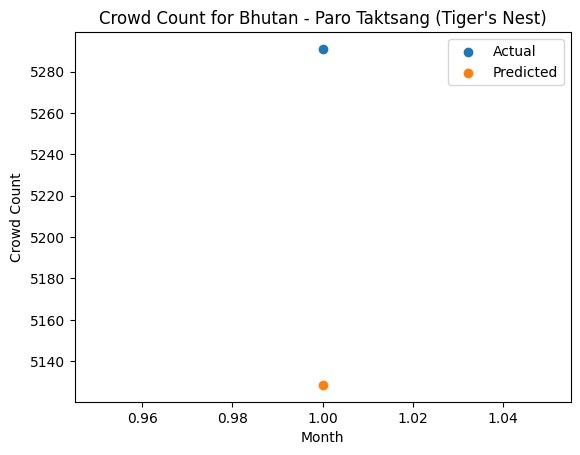

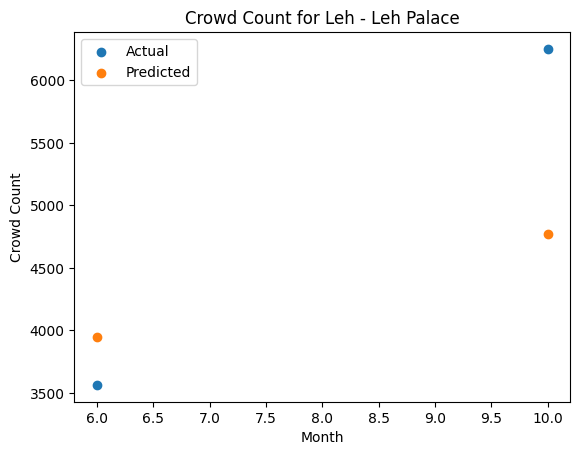

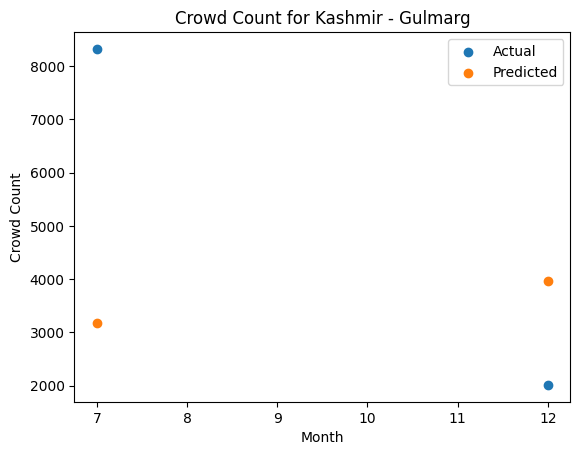

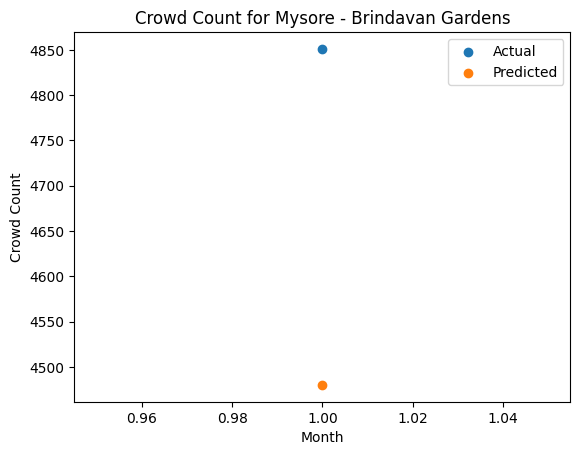

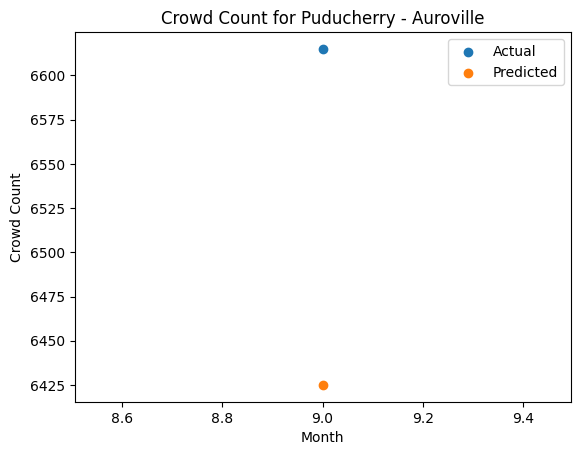

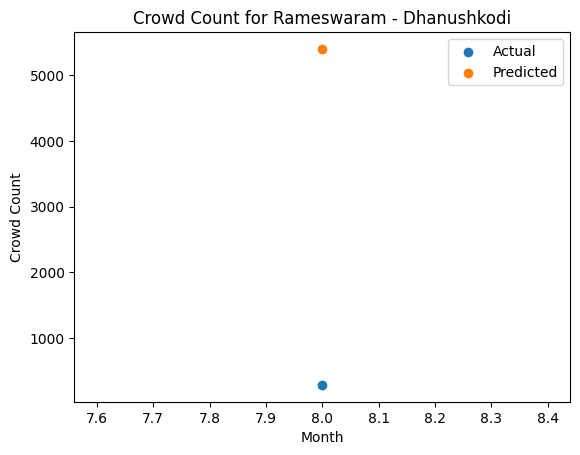

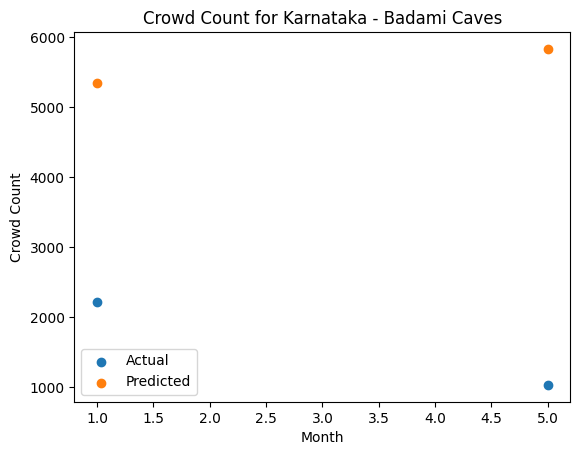

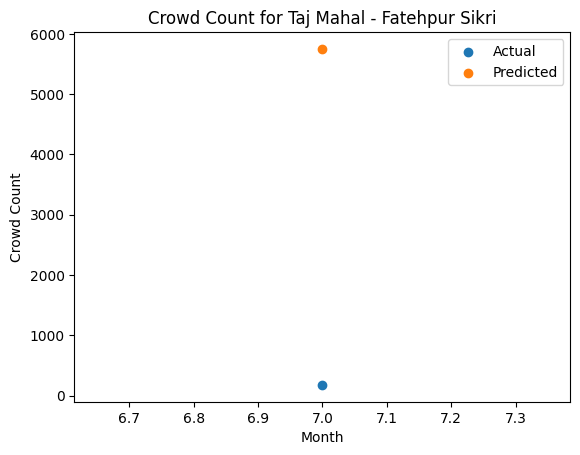

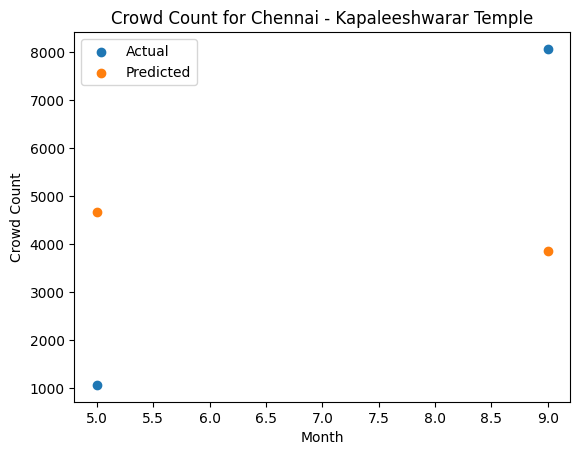

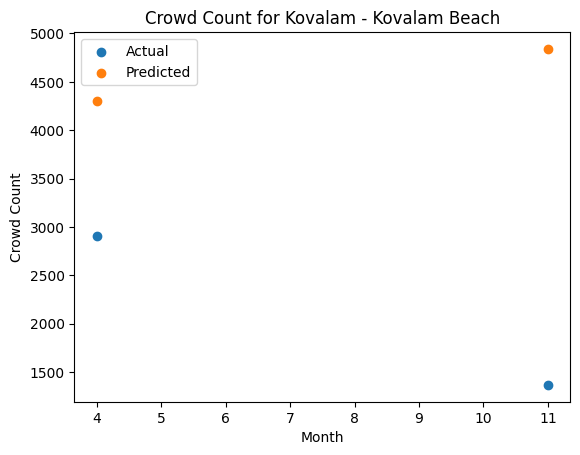

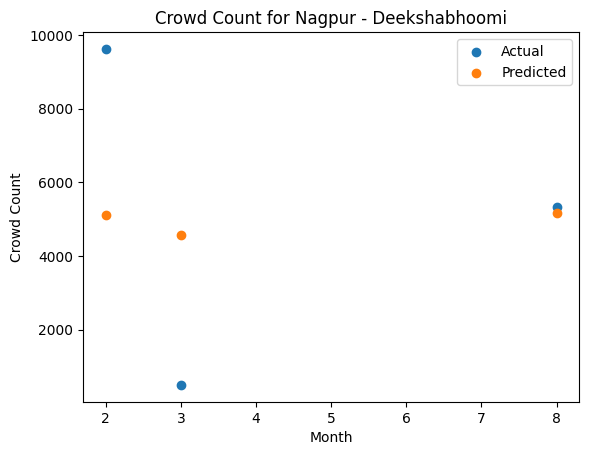

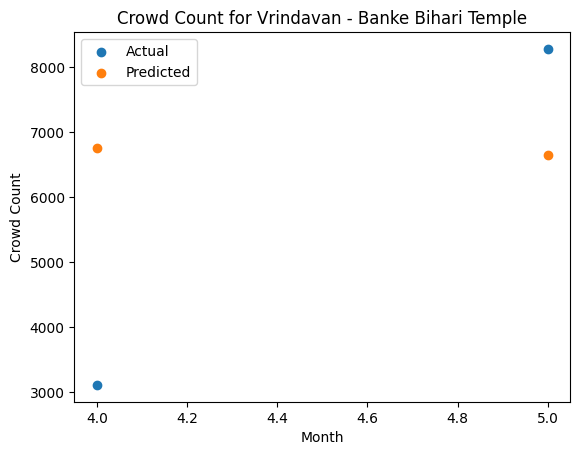

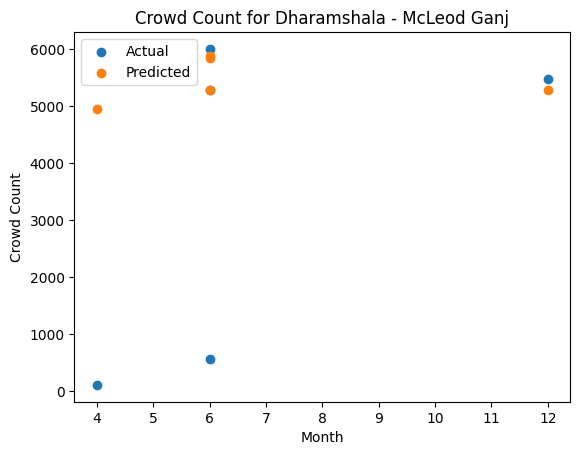

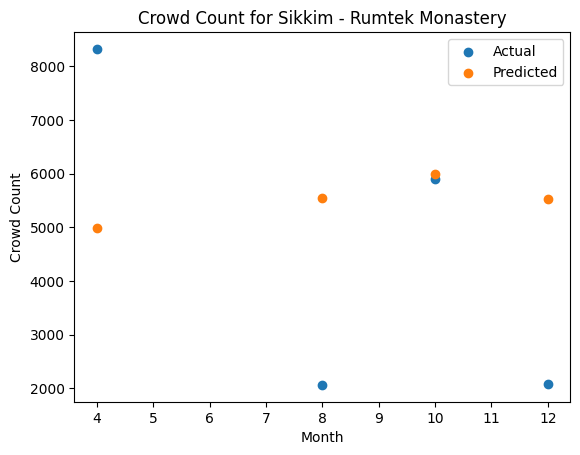

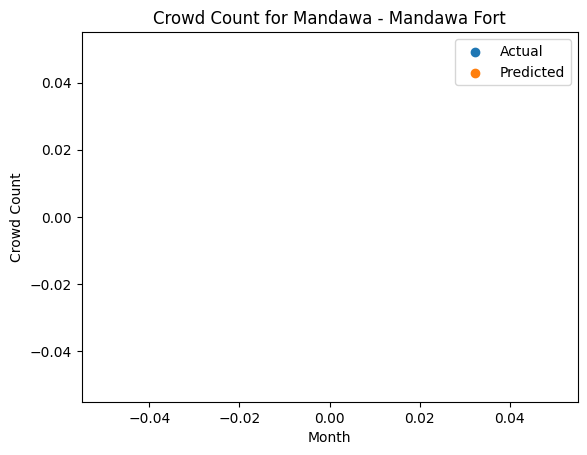

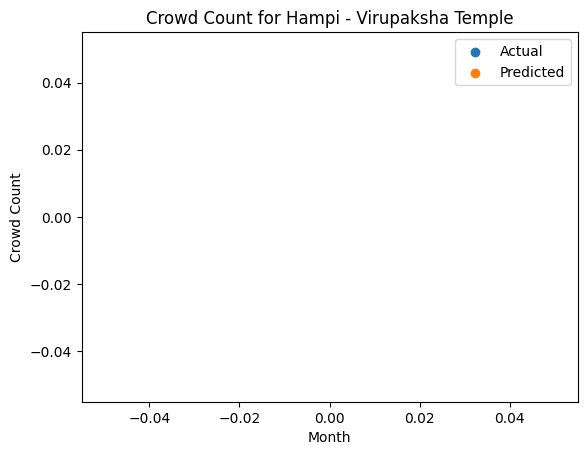

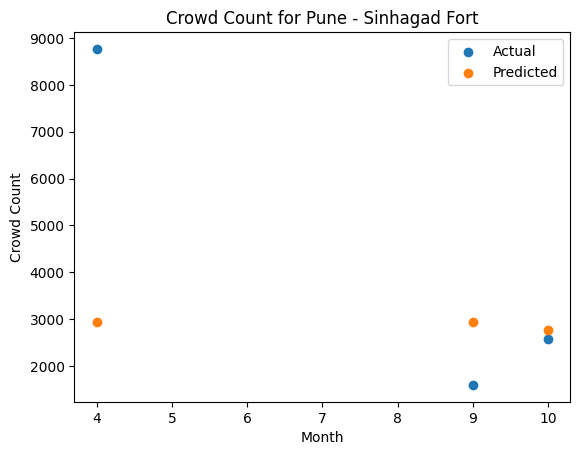

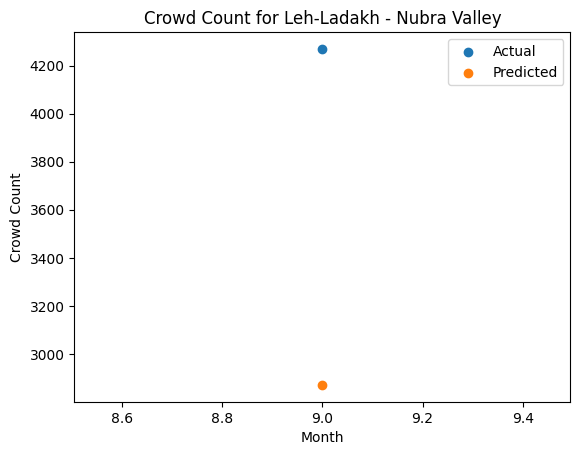

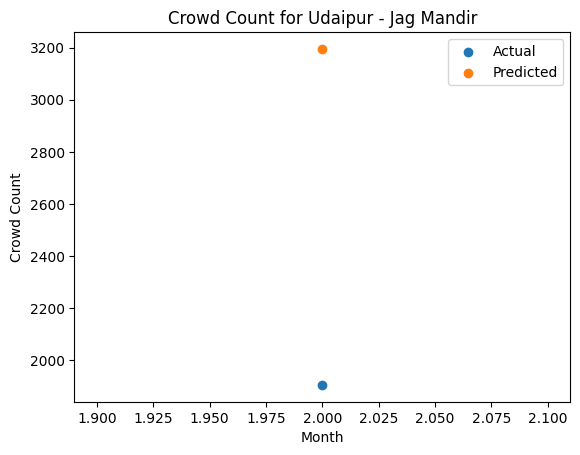

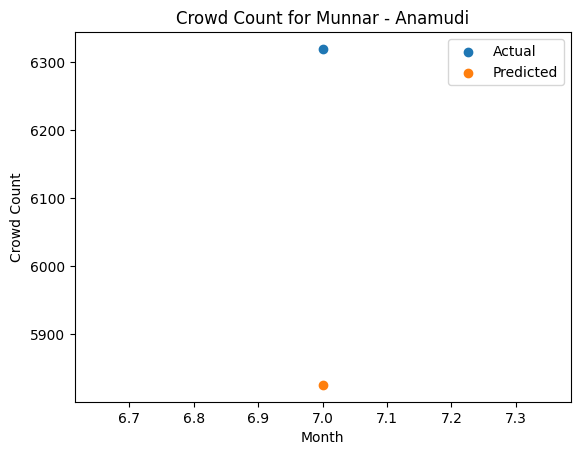

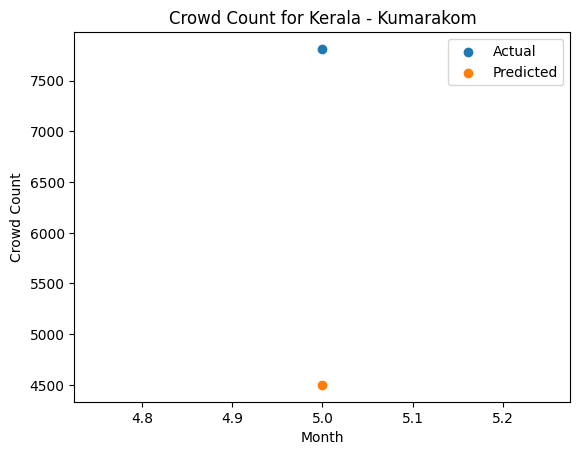

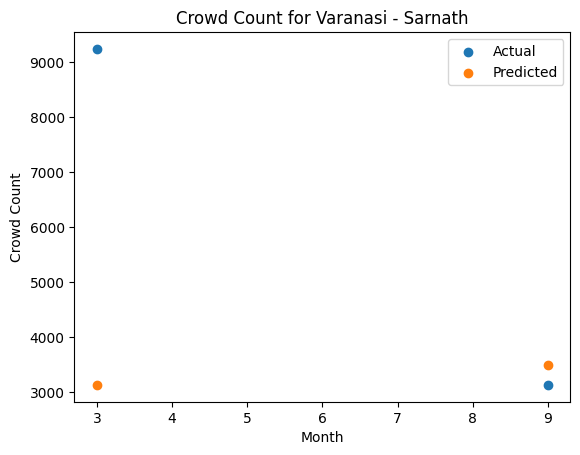

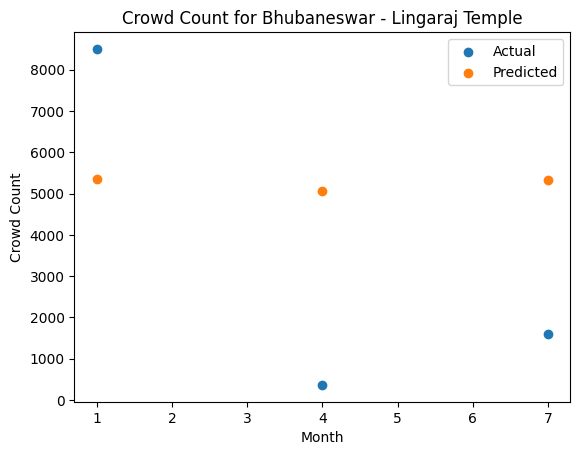

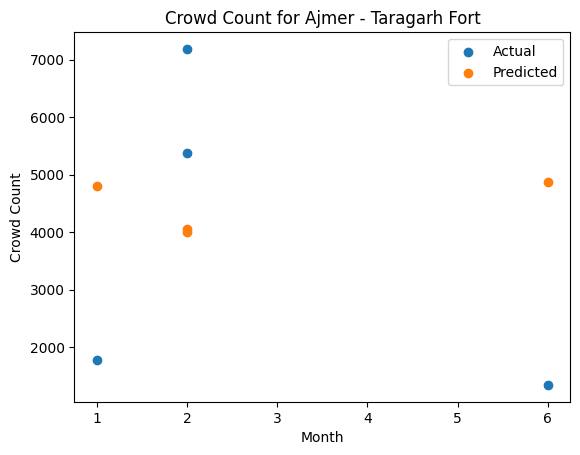

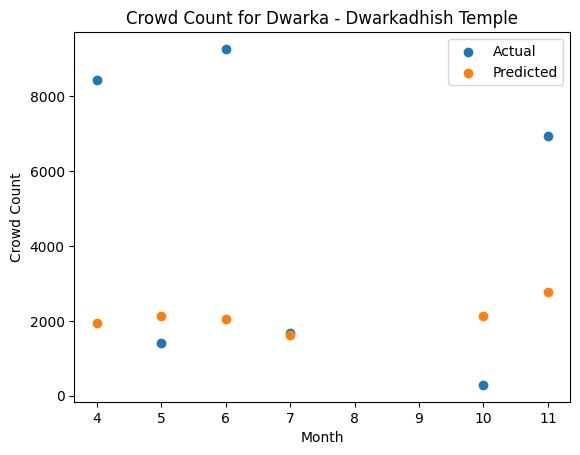

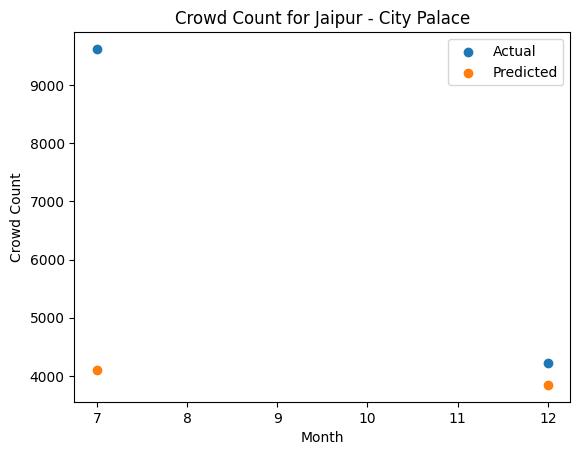

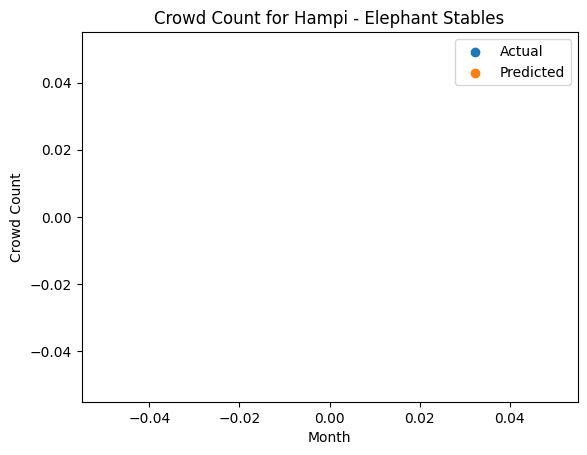

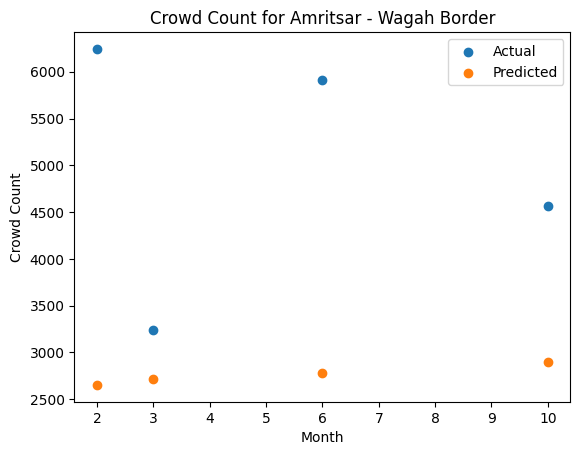

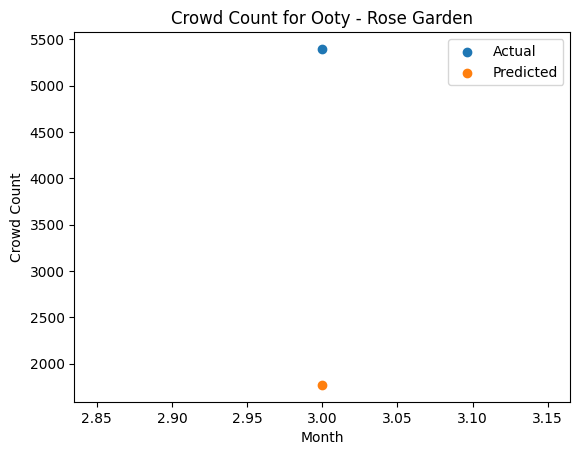

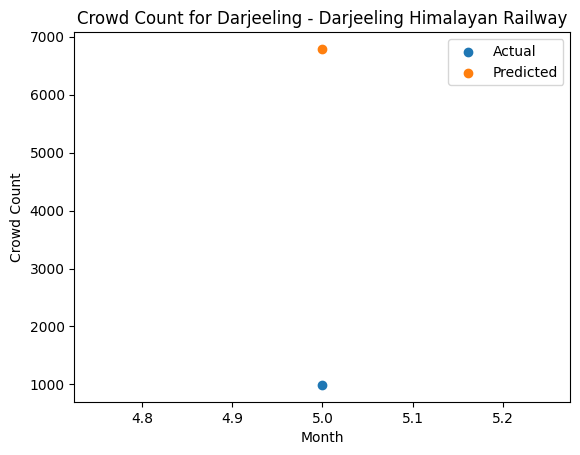

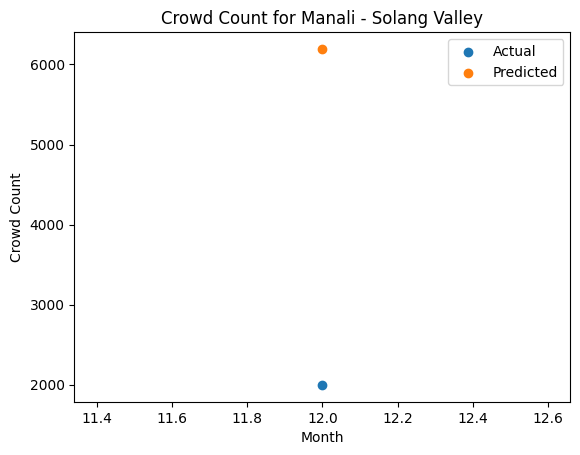

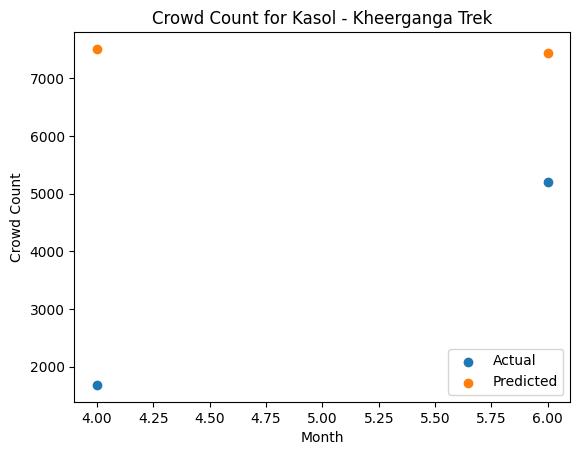

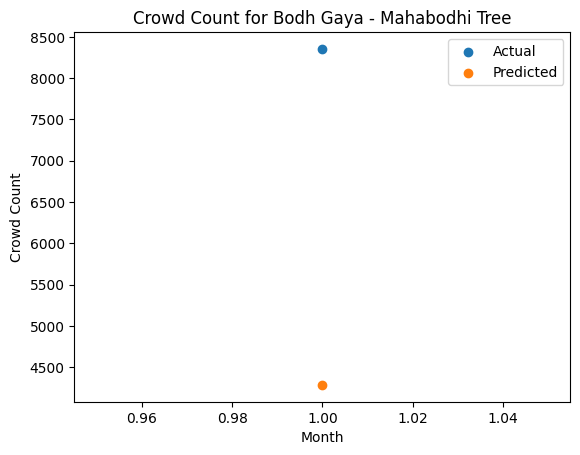

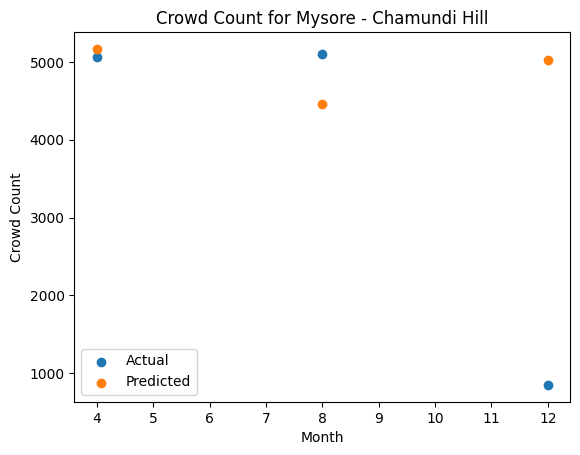

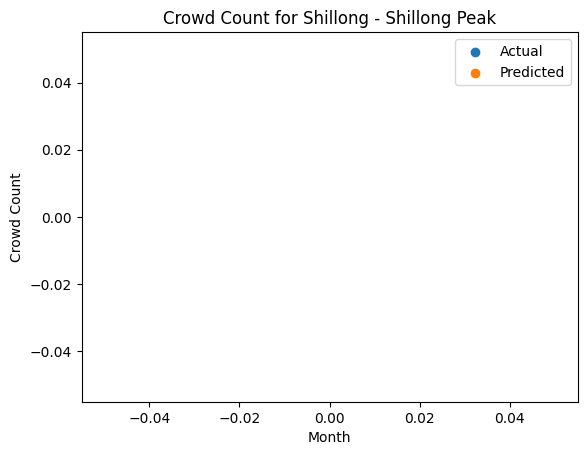

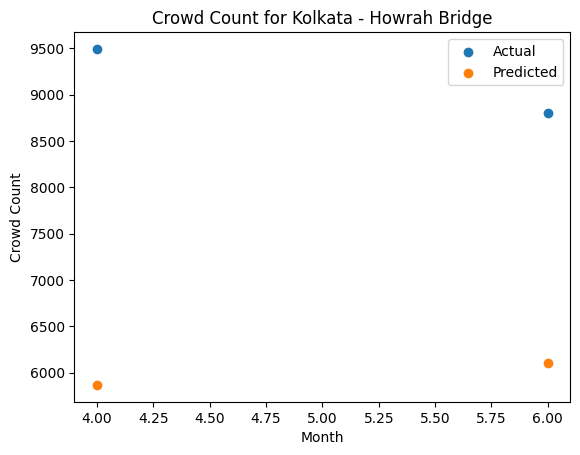

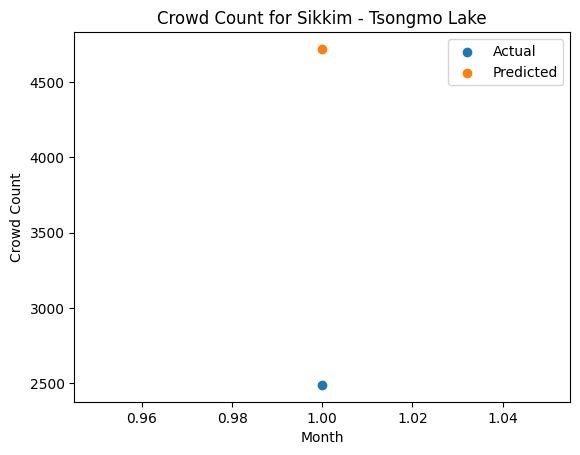

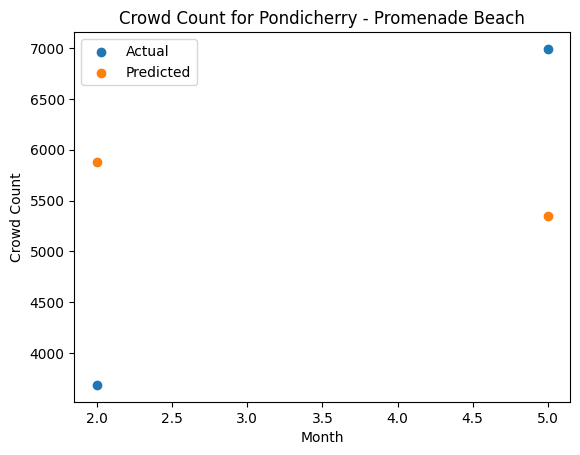

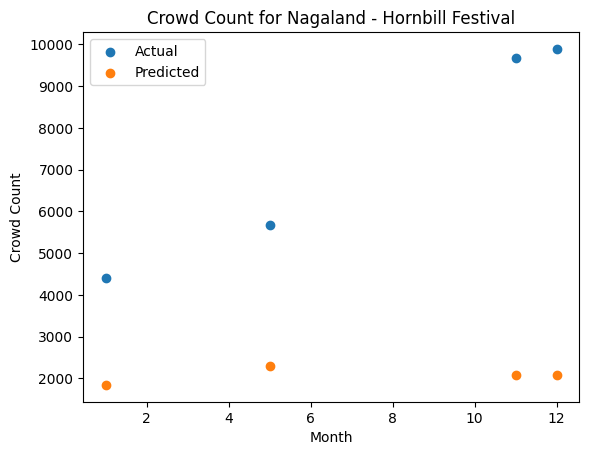

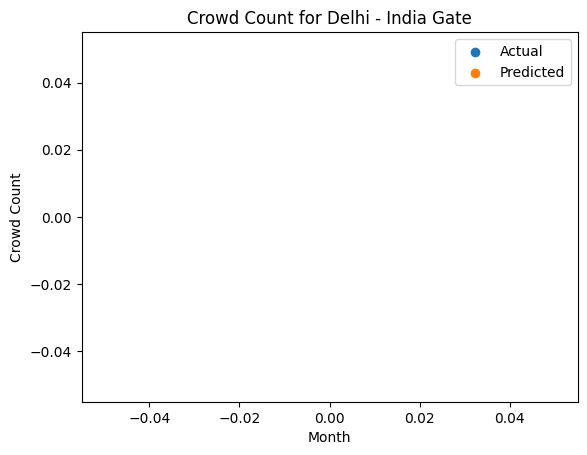

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(0)
n_samples = 1000

# Define regions and districts
regions = ["North", "South", "East", "West"]
districts = ["Agra - Taj Mahal", "Jaipur - Amber Fort", "Goa - Beaches", "Kerala - Backwaters", "Delhi - Red Fort", "Mumbai - Gateway of India", "Varanasi - Ganges River Ghats", "Udaipur - City Palace", "Rajasthan - Thar Desert", "Darjeeling - Tea Gardens", "Amritsar - Golden Temple", "Mysore - Mysore Palace", "Shimla - Mall Road", "Leh-Ladakh - Pangong Lake", "Kolkata - Victoria Memorial", "Chennai - Marina Beach", "Hyderabad - Charminar", "Kochi - Fort Kochi", "Jaisalmer - Jaisalmer Fort", "Rishikesh - Ganges River Rafting", "Khajuraho - Khajuraho Temples", "Aurangabad - Ajanta and Ellora Caves", "Puducherry - French Quarter", "Gangtok - Tsomgo Lake", "Auli - Ski Resort", "Ooty - Nilgiri Mountain Railway", "Bengaluru - Lalbagh Botanical Garden", "Manali - Rohtang Pass", "Haridwar - Har Ki Pauri", "Madurai - Meenakshi Temple", "Hampi - Hampi Ruins", "Rann of Kutch - White Desert", "Kasol - Parvati Valley", "Pushkar - Pushkar Lake", "Pune - Shaniwar Wada", "Ladakh - Khardung La", "Jodhpur - Mehrangarh Fort", "Munnar - Tea Plantations", "Khajuraho - Khajuraho Temples", "Ajmer - Ajmer Sharif Dargah", "Varkala - Varkala Beach", "Rajgir - Vulture Peak", "Kanyakumari - Vivekananda Rock Memorial", "Nainital - Naini Lake", "Tirupati - Tirumala Venkateswara Temple", "Mahabalipuram - Shore Temple", "Rameswaram - Ramanathaswamy Temple", "Kanchipuram - Kanchi Kailasanathar Temple", "Bodh Gaya - Mahabodhi Temple", "Ranikhet - Bhalu Dam", "Kodaikanal - Kodaikanal Lake", "Aurangabad - Bibi Ka Maqbara", "Nalanda - Nalanda University Ruins", "Konark - Sun Temple", "Tiruvannamalai - Arunachaleswarar Temple", "Agra - Agra Fort", "Jaisalmer - Sam Sand Dunes", "Udaipur - Lake Pichola", "Rajasthan - Pushkar Camel Fair", "Mumbai - Elephanta Caves", "Bikaner - Junagarh Fort", "Chandigarh - Rock Garden", "Srinagar - Dal Lake", "Shillong - Umiam Lake", "Guwahati - Kamakhya Temple", "Bhutan - Paro Taktsang (Tiger's Nest)", "Leh - Leh Palace", "Kashmir - Gulmarg", "Mysore - Brindavan Gardens", "Puducherry - Auroville", "Rameswaram - Dhanushkodi", "Karnataka - Badami Caves", "Taj Mahal - Fatehpur Sikri", "Chennai - Kapaleeshwarar Temple", "Kovalam - Kovalam Beach", "Nagpur - Deekshabhoomi", "Vrindavan - Banke Bihari Temple", "Dharamshala - McLeod Ganj", "Sikkim - Rumtek Monastery", "Mandawa - Mandawa Fort", "Hampi - Virupaksha Temple", "Pune - Sinhagad Fort", "Leh-Ladakh - Nubra Valley", "Udaipur - Jag Mandir", "Munnar - Anamudi", "Kerala - Kumarakom", "Varanasi - Sarnath", "Bhubaneswar - Lingaraj Temple", "Ajmer - Taragarh Fort", "Dwarka - Dwarkadhish Temple", "Jaipur - City Palace", "Hampi - Elephant Stables", "Amritsar - Wagah Border", "Ooty - Rose Garden", "Darjeeling - Darjeeling Himalayan Railway", "Manali - Solang Valley", "Kasol - Kheerganga Trek", "Bodh Gaya - Mahabodhi Tree", "Mysore - Chamundi Hill", "Shillong - Shillong Peak", "Kolkata - Howrah Bridge", "Sikkim - Tsongmo Lake", "Pondicherry - Promenade Beach", "Nagaland - Hornbill Festival", "Delhi - India Gate"]

data = {
    "Region": np.random.choice(regions, n_samples),
    "District": np.random.choice(districts, n_samples),
    "Season": np.random.choice(["Summer", "Winter", "Monsoon"], n_samples),
    "Month": np.random.choice(range(1, 13), n_samples),
    "Timeline": np.random.choice(["Morning", "Afternoon", "Evening"], n_samples),
    "CrowdCount": np.random.randint(1, 10000, n_samples),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("tourist_data.csv", index=False)

# Load the data
data = pd.read_csv("tourist_data.csv")

# Encode categorical features
data = pd.get_dummies(data, columns=["Region", "District", "Season", "Timeline"])

# Split data into features and target
X = data.drop("CrowdCount", axis=1)
y = data["CrowdCount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the results for each district
for district in districts:
    mask = X_test[f"District_{district}"] == 1
    plt.scatter(X_test[mask]["Month"], y_test[mask], label="Actual")
    plt.scatter(X_test[mask]["Month"], y_pred[mask], label="Predicted")
    plt.xlabel("Month")
    plt.ylabel("Crowd Count")
    plt.title(f"Crowd Count for {district}")
    plt.legend()
    plt.show()


Mean Squared Error: 10976073.225
R-squared: -0.3092237654858061


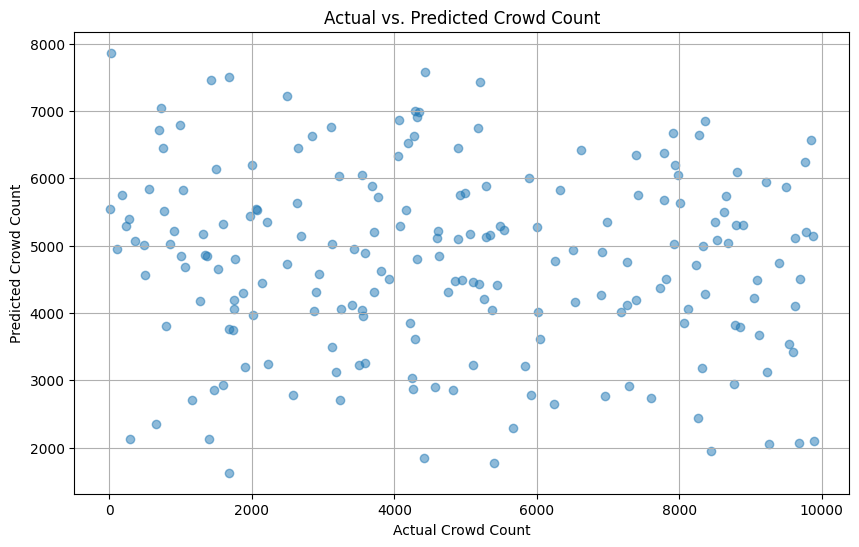

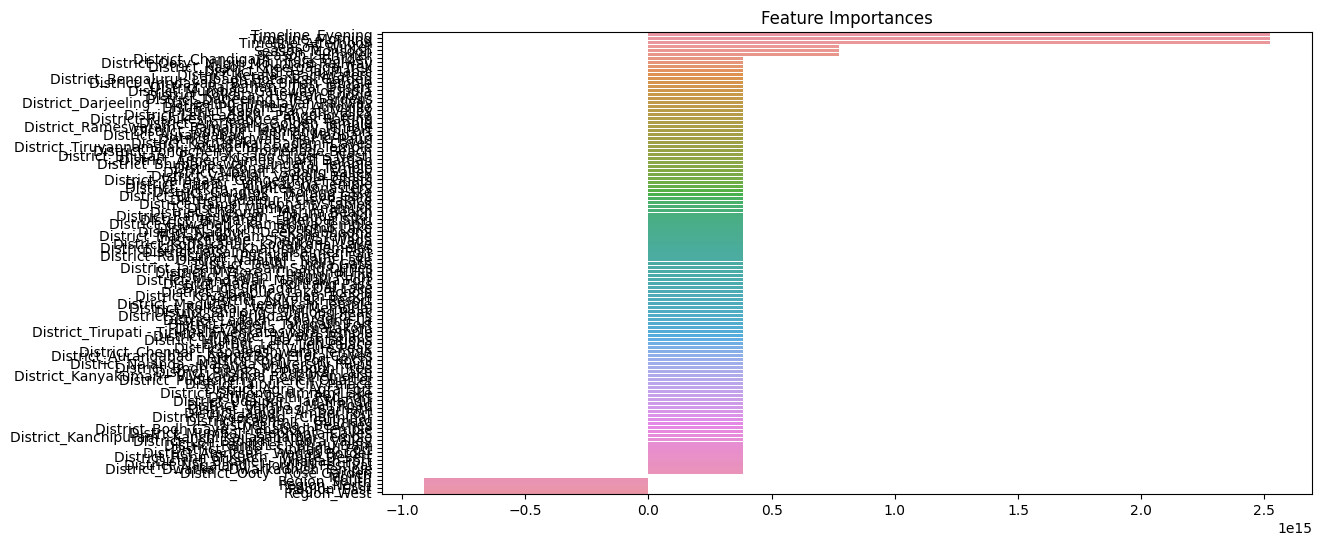

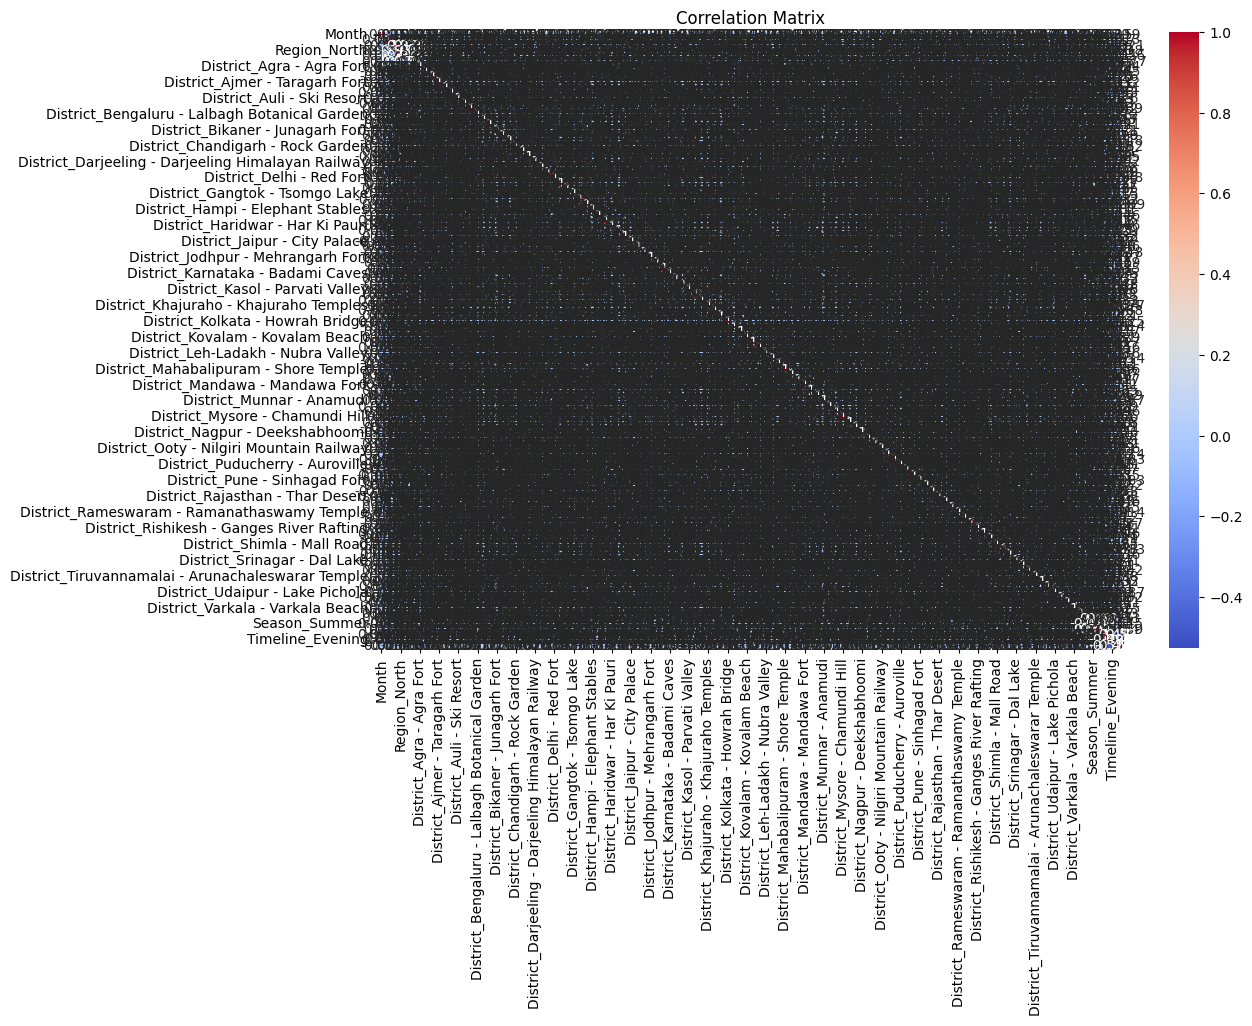

Cross-Validated Mean Squared Error: 9372649.477153596
R-squared (Ridge): -0.2500174750461601


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("tourist_data.csv")

# Encode categorical features
data = pd.get_dummies(data, columns=["Region", "District", "Season", "Timeline"])

# Split data into features and target
X = data.drop("CrowdCount", axis=1)
y = data["CrowdCount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the predicted vs. actual crowd counts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Crowd Count")
plt.ylabel("Predicted Crowd Count")
plt.title("Actual vs. Predicted Crowd Count")
plt.grid()
plt.show()

# Plot feature importances
coef = model.coef_
feature_names = X.columns
feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importances")
plt.show()

# Calculate and plot the correlations
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Perform further analysis and visualization as needed
# You can explore more advanced models, cross-validation, and hyperparameter tuning if required.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Perform k-fold cross-validation
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
cross_val_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cross_val_scores.mean()

print("Cross-Validated Mean Squared Error:", mse_cv)

# Train a Ridge regression model
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the R-squared for the Ridge model
r2_ridge = r2_score(y_test, y_pred_ridge)
print("R-squared (Ridge):", r2_ridge)


In [36]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install flask


In [38]:
from flask import Flask, render_template, request, jsonify
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

app = Flask(__name__)

# Load your trained model here
model = LinearRegression()

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    # Get user input from the HTML form
    features = [float(request.form['feature1']), float(request.form['feature2']), ...]

    # Make predictions
    prediction = model.predict(np.array(features).reshape(1, -1))

    return render_template("index.html", prediction=prediction[0])

if __name__ == "__main__":
    app.run(debug=True)


ModuleNotFoundError: No module named 'flask'

In [39]:
import pandas as pd
import random

# Create a larger dataset with 100 districts in India
num_records = 1000
districts = [f"District{d}" for d in range(1, 101)]

data = {
    'Region': random.choices(districts, k=num_records),
    'Month': random.choices(range(1, 13), k=num_records),
    'Season': random.choices(['Winter', 'Spring', 'Summer', 'Monsoon', 'Autumn'], k=num_records),
    'Weather': random.choices(['Sunny', 'Rainy', 'Cloudy'], k=num_records),
    'HotelAvailability': random.choices(['Low', 'Medium', 'High'], k=num_records),
    'LocalEvents': random.choices(['Festival', 'Cultural Event', 'None'], k=num_records),
    'CrowdCount': [random.randint(100, 10000) for _ in range(num_records)]
}

df = pd.DataFrame(data)
df.to_csv('tourist_data.csv', index=False)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and preprocess the data (you need to implement this part)
# X, y = preprocess_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


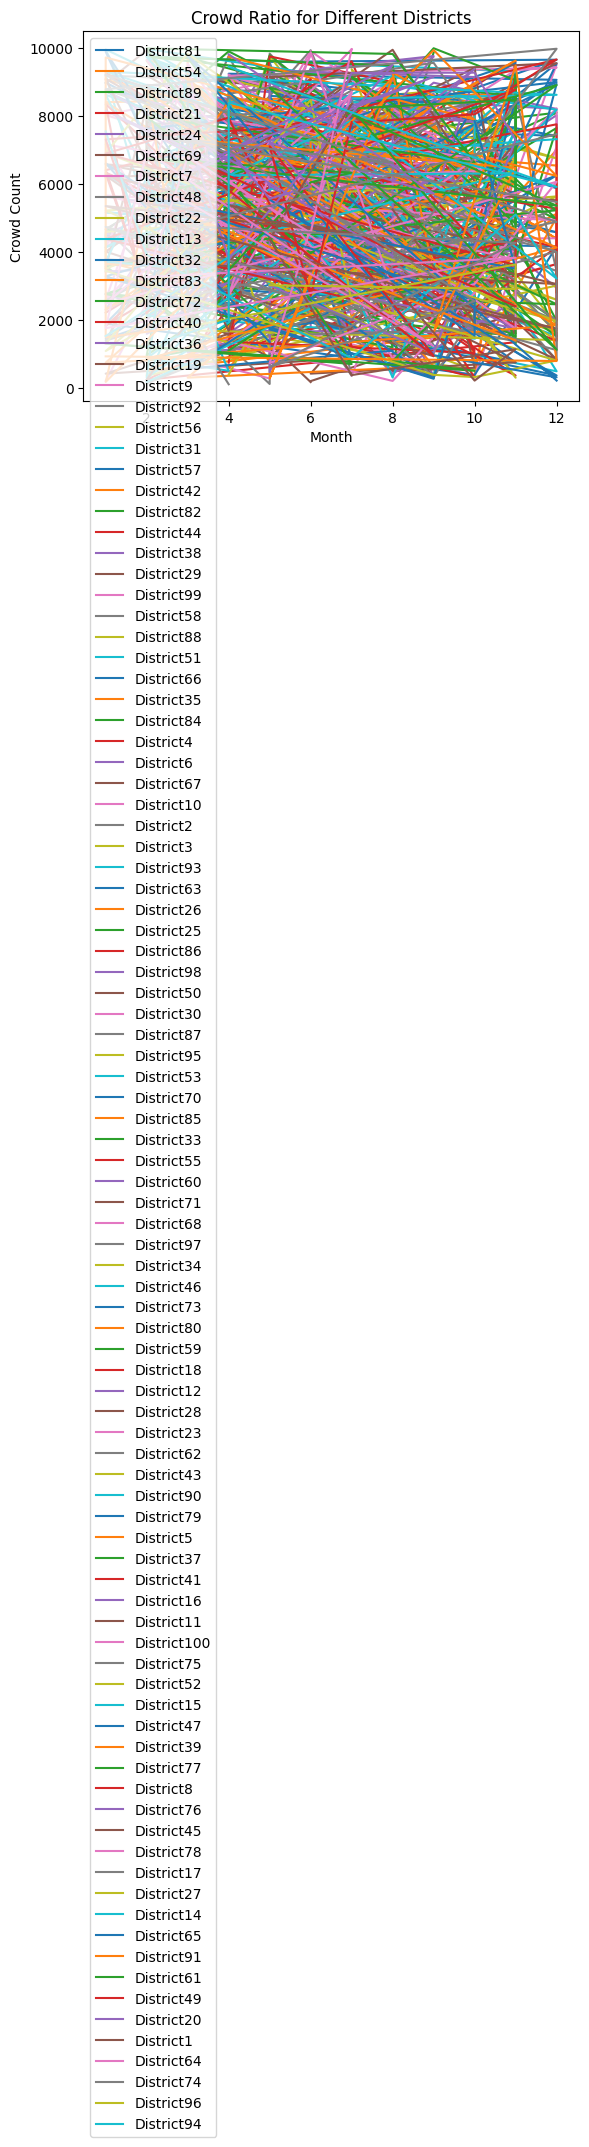

In [41]:
import matplotlib.pyplot as plt

# Assuming you have crowd ratio data for each district
districts = df['Region'].unique()

for district in districts:
    district_data = df[df['Region'] == district]
    plt.plot(district_data['Month'], district_data['CrowdCount'], label=district)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Crowd Count')
plt.title('Crowd Ratio for Different Districts')
plt.show()


In [42]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

print("\nModel Accuracy (Mean Squared Error):", mse)


ValueError: could not convert string to float: 'District81'

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'your_data.csv' with the actual dataset file)
data = pd.read_csv('tourist_data.csv')

# Data preprocessing
# (Include data preprocessing steps here, such as handling missing values, encoding categorical features, feature scaling, etc.)

# Split data into features (X) and target (y)
X = data.drop('Region', axis=1)
y = data['CrowdCount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier (you can experiment with hyperparameters)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


ValueError: could not convert string to float: 'Autumn'

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load your dataset (replace 'your_data.csv' with the actual dataset file)
data = pd.read_csv('tourist_data.csv')

# Data preprocessing
# Assuming 'Season' is a categorical feature, let's one-hot encode it
data = pd.get_dummies(data, columns=['Season'])

# Split data into features (X) and target (y)
X = data.drop('Region', axis=1)
y = data['CrowdCount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier (you can experiment with hyperparameters)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


ValueError: could not convert string to float: 'Cloudy'

Model trained and saved to your_trained_model.pkl


C:\Users\Kunal Mukherjee\AppData\Local\Temp\ipykernel_16252\2991914373.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 10000], [0, 10000], '--k', color='red', label='Ideal')


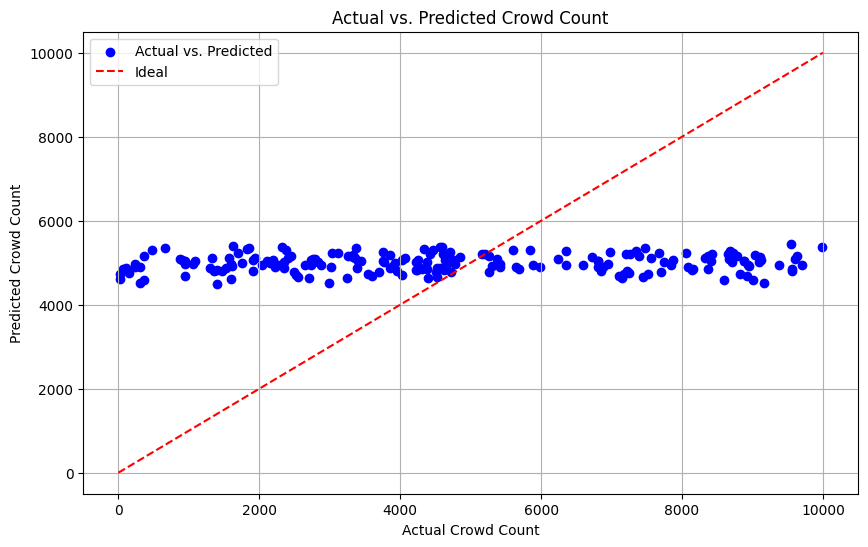

In [52]:
import pandas as pd
import numpy as np

# Number of records (1000 in your case)
n_records = 1000

# Generate synthetic data
data = {
    "Region": np.random.choice(["North", "South", "East", "West"], n_records),
    "District": np.random.choice(["District1", "District2", "District3", "District4"], n_records),
    "Season": np.random.choice(["Summer", "Winter", "Monsoon"], n_records),
    "Month": np.random.choice(range(1, 13), n_records),
    "Timeline": np.random.choice(["Morning", "Afternoon", "Evening"], n_records),
    "CrowdCount": np.random.randint(1, 10000, n_records),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("tourist_data.csv", index=False)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("tourist_data.csv")

# Encode categorical features
data = pd.get_dummies(data, columns=["Region", "District", "Season", "Timeline"])

# Split data into features and target
X = data.drop("CrowdCount", axis=1)
y = data["CrowdCount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
import joblib

# Save the trained model to a file
model_filename = 'your_trained_model.pkl'  # Replace with your desired filename
joblib.dump(model, model_filename)

print("Model trained and saved to", model_filename)

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([0, 10000], [0, 10000], '--k', color='red', label='Ideal')
plt.xlabel('Actual Crowd Count')
plt.ylabel('Predicted Crowd Count')
plt.title('Actual vs. Predicted Crowd Count')
plt.legend()
plt.grid(True)
plt.show()



KNN Model trained and saved to knn_trained_model.pkl


C:\Users\Kunal Mukherjee\AppData\Local\Temp\ipykernel_16252\3162315307.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 10000], [0, 10000], '--k', color='red', label='Ideal')


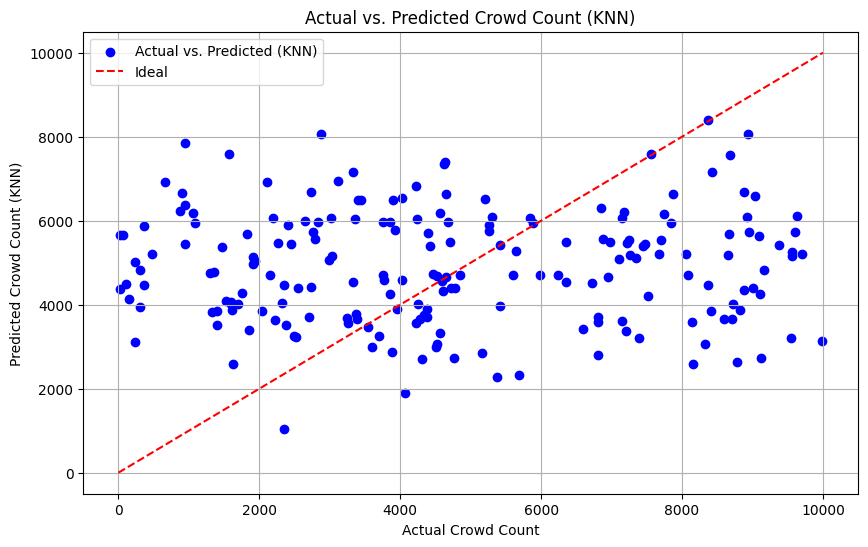

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import joblib
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("tourist_data.csv")

# Encode categorical features
data = pd.get_dummies(data, columns=["Region", "District", "Season", "Timeline"])

# Split data into features and target
X = data.drop("CrowdCount", axis=1)
y = data["CrowdCount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN model (replace n_neighbors with your desired value)
n_neighbors = 5  # You can choose a different number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_model.fit(X_train, y_train)

# Save the trained KNN model to a file
knn_model_filename = 'knn_trained_model.pkl'
joblib.dump(knn_model, knn_model_filename)
print("KNN Model trained and saved to", knn_model_filename)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Create a scatter plot to compare actual vs. predicted values for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue', label='Actual vs. Predicted (KNN)')
plt.plot([0, 10000], [0, 10000], '--k', color='red', label='Ideal')
plt.xlabel('Actual Crowd Count')
plt.ylabel('Predicted Crowd Count (KNN)')
plt.title('Actual vs. Predicted Crowd Count (KNN)')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for KNN
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("Root Mean Squared Error (RMSE) for KNN Model:", rmse)


Root Mean Squared Error (RMSE) for KNN Model: 3057.1286036410047


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import joblib

# Load the dataset
data = pd.read_csv("tourist_data.csv")

# Encode categorical features
data = pd.get_dummies(data, columns=["Region", "District", "Season", "Timeline"])

# Split data into features and target
X = data.drop("CrowdCount", axis=1)
y = data["CrowdCount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model
knn_model = KNeighborsRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': range(1, 21),  # Try different numbers of neighbors
    'metric': ['euclidean', 'manhattan'],  # Try different distance metrics
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']

# Train the KNN model with the best hyperparameters
best_knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors, metric=best_metric)
best_knn_model.fit(X_train, y_train)

# Save the trained KNN model to a file
knn_model_filename = 'knn_trained_model.pkl'
joblib.dump(best_knn_model, knn_model_filename)
print("KNN Model trained with the best hyperparameters and saved to", knn_model_filename)

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)


KNN Model trained with the best hyperparameters and saved to knn_trained_model.pkl


In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)

# Calculate RMSE for KNN
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("Root Mean Squared Error (RMSE) for KNN Model:", rmse)


Root Mean Squared Error (RMSE) for KNN Model: 2815.1734516735933


In [57]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) for KNN
r2 = r2_score(y_test, y_pred_knn)
print("R-squared (R2) for KNN Model:", r2)


R-squared (R2) for KNN Model: -0.03310750457203593


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import joblib
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv("tourist_data.csv")

# Encode categorical features
data = pd.get_dummies(data, columns=["Region", "District", "Season", "Timeline"])

# Split data into features and target
X = data.drop("CrowdCount", axis=1)
y = data["CrowdCount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model
knn_model = KNeighborsRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': range(1, 21),  # Try different numbers of neighbors
    'metric': ['euclidean', 'manhattan'],  # Try different distance metrics
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']

# Train the KNN model with the best hyperparameters
best_knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors, metric=best_metric)
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)

# Calculate RMSE for KNN
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("Root Mean Squared Error (RMSE) for KNN Model:", rmse)

# Save the trained KNN model to a file
knn_model_filename = 'knn_trained_model.pkl'
joblib.dump(best_knn_model, knn_model_filename)
print("KNN Model trained with the best hyperparameters and saved to", knn_model_filename)


Root Mean Squared Error (RMSE) for KNN Model: 2815.1734516735933
KNN Model trained with the best hyperparameters and saved to knn_trained_model.pkl


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
np.random.seed(0)

# Create a list of tourist locations in India
locations = ["Goa", "Jaipur", "Kerala", "Agra", "Shimla", "Varanasi", "Mumbai", "Delhi", "Kolkata", "Bangalore"]

# Create a random month column (1 to 12)
months = np.random.randint(1, 13, 1000)

# Generate random crowd counts, senior citizens, adults, young children, and population density
crowd_count = np.random.randint(1, 1001, 1000)
senior_citizens = np.random.randint(1, 101, 1000)
adults = np.random.randint(1, 501, 1000)
young_children = np.random.randint(1, 301, 1000)
population_density = np.random.uniform(50, 1500, 1000)

# Create a pandas DataFrame for the dataset
data = pd.DataFrame({
    "tourist_location": np.random.choice(locations, 1000),
    "month": months,
    "crowd_count": crowd_count,
    "number_of_senior_citizens": senior_citizens,
    "number_of_adults": adults,
    "number_of_young_children": young_children,
    "population_density": population_density
})

# Split the data into features (X) and target (y)
X = data[['month', 'number_of_senior_citizens', 'number_of_adults', 'number_of_young_children', 'population_density']]
y = data['crowd_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier (you can adjust the 'n_neighbors' parameter)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")

# Analyze crowd count distribution based on location
location_crowd_count = data.groupby('tourist_location')['crowd_count'].mean().reset_index()
location_crowd_count['crowd_level'] = np.where(location_crowd_count['crowd_count'] > location_crowd_count['crowd_count'].mean(), 'Crowded', 'Not Crowded')

# Display the analysis
print("Crowd count distribution based on location:")
print(location_crowd_count)

# Provide recommendations to users
def is_crowded(location):
    if location in location_crowd_count['tourist_location'].values:
        crowd_level = location_crowd_count.loc[location_crowd_count['tourist_location'] == location, 'crowd_level'].values[0]
        return f"The place '{location}' is {crowd_level}."
    else:
        return f"Location '{location}' not found in the dataset."

# Example: Check if a location is crowded or not
location_to_check = 'Goa'
result = is_crowded(location_to_check)
print(result)


Accuracy of KNN model: 0.00%
Crowd count distribution based on location:
  tourist_location  crowd_count  crowd_level
0             Agra   511.291667      Crowded
1        Bangalore   472.657407  Not Crowded
2            Delhi   478.420455  Not Crowded
3              Goa   487.928571  Not Crowded
4           Jaipur   523.669421      Crowded
5           Kerala   486.797468  Not Crowded
6          Kolkata   438.754902  Not Crowded
7           Mumbai   541.571429      Crowded
8           Shimla   473.073684  Not Crowded
9         Varanasi   478.173469  Not Crowded
The place 'Goa' is Not Crowded.


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
np.random.seed(0)

# Create a list of tourist locations in India
locations = ["Goa", "Jaipur", "Kerala", "Agra", "Shimla", "Varanasi", "Mumbai", "Delhi", "Kolkata", "Bangalore"]

# Create a random month column (1 to 12)
months = np.random.randint(1, 13, 1000)

# Generate random crowd counts, senior citizens, adults, young children, and population density
crowd_count = np.random.randint(1, 1001, 1000)
senior_citizens = np.random.randint(1, 101, 1000)
adults = np.random.randint(1, 501, 1000)
young_children = np.random.randint(1, 301, 1000)
population_density = np.random.uniform(50, 1500, 1000)

# Create a pandas DataFrame for the dataset
data = pd.DataFrame({
    "tourist_location": np.random.choice(locations, 1000),
    "month": months,
    "crowd_count": crowd_count,
    "number_of_senior_citizens": senior_citizens,
    "number_of_adults": adults,
    "number_of_young_children": young_children,
    "population_density": population_density
})

# Split the data into features (X) and target (y)
X = data[['month', 'number_of_senior_citizens', 'number_of_adults', 'number_of_young_children', 'population_density']]
y = data['crowd_count']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with adjusted hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model: {accuracy * 100:.2f}%")


Accuracy of Random Forest model: 0.00%


In [67]:
import pandas as pd
import numpy as np

# Create a list of tourist locations in India
locations = ["Goa", "Jaipur", "Kerala", "Agra", "Shimla", "Varanasi", "Mumbai", "Delhi", "Kolkata", "Bangalore"]

# Generate synthetic data for the dataset
np.random.seed(0)
data = pd.DataFrame({
    "tourist_location": np.random.choice(locations, 1000),
    "month": np.random.randint(1, 13, 1000),
    "crowd_count": np.random.randint(1, 1001, 1000),
    "number_of_senior_citizens": np.random.randint(1, 101, 1000),
    "number_of_adults": np.random.randint(1, 501, 1000),
    "number_of_young_children": np.random.randint(1, 301, 1000),
    "population_density": np.random.uniform(50, 1500, 1000)
})
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = data[['month', 'number_of_senior_citizens', 'number_of_adults', 'number_of_young_children', 'population_density']]
y = data['crowd_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")

# Analyze crowd count distribution based on location
location_crowd_count = data.groupby('tourist_location')['crowd_count'].mean().reset_index()
location_crowd_count['crowd_level'] = np.where(location_crowd_count['crowd_count'] > location_crowd_count['crowd_count'].mean(), 'Crowded', 'Not Crowded')

# Display the analysis
print("Crowd count distribution based on location:")
print(location_crowd_count)

# Provide recommendations to users
def is_crowded(location):
    if location in location_crowd_count['tourist_location'].values:
        crowd_level = location_crowd_count.loc[location_crowd_count['tourist_location'] == location, 'crowd_level'].values[0]
        return f"The place '{location}' is {crowd_level}."
    else:
        return f"Location '{location}' not found in the dataset."

# Example: Check if a location is crowded or not
location_to_check = 'Goa'
result = is_crowded(location_to_check)
print(result)
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Load your dataset and preprocess it
# Assuming you have a DataFrame 'data' with columns: month, crowd_count, location, ...

# Feature scaling
scaler = MinMaxScaler()
data[['month', 'crowd_count']] = scaler.fit_transform(data[['month', 'crowd_count']])

# Define the sequence length (number of time steps) and features
sequence_length = 10
n_features = 2  # In this example, using 'month' and 'crowd_count'

# Create sequences for training
sequences = []
target = []
for i in range(len(data) - sequence_length):
    sequences.append(data.iloc[i:i + sequence_length][['month', 'crowd_count']].values)
    target.append(data.iloc[i + sequence_length]['crowd_count'])

X = np.array(sequences)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train an RNN model
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(32, activation='relu', input_shape=(sequence_length, n_features)))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Accuracy of KNN model: 0.00%
Crowd count distribution based on location:
  tourist_location  crowd_count  crowd_level
0             Agra   508.122951      Crowded
1        Bangalore   504.604167      Crowded
2            Delhi   468.092784  Not Crowded
3              Goa   484.151515  Not Crowded
4           Jaipur   529.093750      Crowded
5           Kerala   505.175258      Crowded
6          Kolkata   490.305263  Not Crowded
7           Mumbai   472.265957  Not Crowded
8           Shimla   441.535354  Not Crowded
9         Varanasi   542.714286      Crowded
The place 'Goa' is Not Crowded.


ModuleNotFoundError: No module named 'tensorflow'

In [73]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import numpy as np

# Create a list of tourist locations in India
locations = ["Goa", "Jaipur", "Kerala", "Agra", "Shimla", "Varanasi", "Mumbai", "Delhi", "Kolkata", "Bangalore"]

# Generate synthetic data for the dataset
np.random.seed(0)
data = pd.DataFrame({
    "tourist_location": np.random.choice(locations, 1000),
    "month": np.random.randint(1, 13, 1000),
    "crowd_count": np.random.randint(1, 1001, 1000),
    "number_of_senior_citizens": np.random.randint(1, 101, 1000),
    "number_of_adults": np.random.randint(1, 501, 1000),
    "number_of_young_children": np.random.randint(1, 301, 1000),
    "population_density": np.random.uniform(50, 1500, 1000)
})
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = data[['month', 'number_of_senior_citizens', 'number_of_adults', 'number_of_young_children', 'population_density']]
y = data['crowd_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")

# Analyze crowd count distribution based on location
location_crowd_count = data.groupby('tourist_location')['crowd_count'].mean().reset_index()
location_crowd_count['crowd_level'] = np.where(location_crowd_count['crowd_count'] > location_crowd_count['crowd_count'].mean(), 'Crowded', 'Not Crowded')

# Display the analysis
print("Crowd count distribution based on location:")
print(location_crowd_count)

# Provide recommendations to users
def is_crowded(location):
    if location in location_crowd_count['tourist_location'].values:
        crowd_level = location_crowd_count.loc[location_crowd_count['tourist_location'] == location, 'crowd_level'].values[0]
        return f"The place '{location}' is {crowd_level}."
    else:
        return f"Location '{location}' not found in the dataset."

# Example: Check if a location is crowded or not
location_to_check = 'Goa'
result = is_crowded(location_to_check)
print(result)
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Load your dataset and preprocess it
# Assuming you have a DataFrame 'data' with columns: month, crowd_count, location, ...

# Feature scaling
scaler = MinMaxScaler()
data[['month', 'crowd_count']] = scaler.fit_transform(data[['month', 'crowd_count']])

# Define the sequence length (number of time steps) and features
sequence_length = 10
n_features = 2  # In this example, using 'month' and 'crowd_count'

# Create sequences for training
sequences = []
target = []
for i in range(len(data) - sequence_length):
    sequences.append(data.iloc[i:i + sequence_length][['month', 'crowd_count']].values)
    target.append(data.iloc[i + sequence_length]['crowd_count'])

X = np.array(sequences)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train an RNN model
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(32, activation='relu', input_shape=(sequence_length, n_features)))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Accuracy of KNN model: 0.00%
Crowd count distribution based on location:
  tourist_location  crowd_count  crowd_level
0             Agra   508.122951      Crowded
1        Bangalore   504.604167      Crowded
2            Delhi   468.092784  Not Crowded
3              Goa   484.151515  Not Crowded
4           Jaipur   529.093750      Crowded
5           Kerala   505.175258      Crowded
6          Kolkata   490.305263  Not Crowded
7           Mumbai   472.265957  Not Crowded
8           Shimla   441.535354  Not Crowded
9         Varanasi   542.714286      Crowded
The place 'Goa' is Not Crowded.
Epoch 1/50
25/25 - 1s - loss: 0.1458 - 1s/epoch - 54ms/step
Epoch 2/50
25/25 - 0s - loss: 0.0964 - 72ms/epoch - 3ms/step
Epoch 3/50
25/25 - 0s - loss: 0.0906 - 70ms/epoch - 3ms/step
Epoch 4/50
25/25 - 0s - loss: 0.0873 - 77ms/epoch - 3ms/step
Epoch 5/50
25/25 - 0s - loss: 0.0857 - 78ms/epoch - 3ms/step
Epoch 6/50
25/25 - 0s - loss: 0.0869 - 70ms/epoch - 3ms/step
Epoch 7/50
25/25 - 0s - loss: 0.086

In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Load your dataset and preprocess it
# Assuming you have a DataFrame 'data' with columns: month, crowd_count, location, ...

# Feature scaling
scaler = MinMaxScaler()
data[['month', 'crowd_count']] = scaler.fit_transform(data[['month', 'crowd_count']])

# Define the sequence length (number of time steps) and features
sequence_length = 10
n_features = 2  # In this example, using 'month' and 'crowd_count'

# Create sequences for training
sequences = []
target = []
for i in range(len(data) - sequence_length):
    sequences.append(data.iloc[i:i + sequence_length][['month', 'crowd_count']].values)
    target.append(data.iloc[i + sequence_length]['crowd_count'])

X = np.array(sequences)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train an RNN model
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(32, activation='relu', input_shape=(sequence_length, n_features))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.6f}")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3648148819.py, line 35)

In [77]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Load your dataset and preprocess it
# Assuming you have a DataFrame 'data' with columns: month, crowd_count, location, ...

# Feature scaling
scaler = MinMaxScaler()
data[['month', 'crowd_count']] = scaler.fit_transform(data[['month', 'crowd_count']])

# Define the sequence length (number of time steps) and features
sequence_length = 10
n_features = 2  # In this example, using 'month' and 'crowd_count'

# Create sequences for training
sequences = []
target = []
for i in range(len(data) - sequence_length):
    sequences.append(data.iloc[i:i + sequence_length][['month', 'crowd_count']].values)
    target.append(data.iloc[i + sequence_length]['crowd_count'])

X = np.array(sequences)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train an RNN model
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(32, activation='relu', input_shape=(sequence_length, n_features)))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.6f}")


Epoch 1/100
25/25 - 1s - loss: 0.4893 - 942ms/epoch - 38ms/step
Epoch 2/100
25/25 - 0s - loss: 0.2295 - 66ms/epoch - 3ms/step
Epoch 3/100
25/25 - 0s - loss: 0.1402 - 65ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 0.1080 - 66ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0984 - 69ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0918 - 69ms/epoch - 3ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0879 - 70ms/epoch - 3ms/step
Epoch 8/100
25/25 - 0s - loss: 0.0867 - 76ms/epoch - 3ms/step
Epoch 9/100
25/25 - 0s - loss: 0.0849 - 75ms/epoch - 3ms/step
Epoch 10/100
25/25 - 0s - loss: 0.0852 - 92ms/epoch - 4ms/step
Epoch 11/100
25/25 - 0s - loss: 0.0847 - 72ms/epoch - 3ms/step
Epoch 12/100
25/25 - 0s - loss: 0.0845 - 67ms/epoch - 3ms/step
Epoch 13/100
25/25 - 0s - loss: 0.0848 - 76ms/epoch - 3ms/step
Epoch 14/100
25/25 - 0s - loss: 0.0856 - 100ms/epoch - 4ms/step
Epoch 15/100
25/25 - 0s - loss: 0.0840 - 84ms/epoch - 3ms/step
Epoch 16/100
25/25 - 0s - loss: 0.0847 - 77ms/epoch - 3ms/ste

In [81]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Load your dataset and preprocess it
# Assuming you have a DataFrame 'data' with columns: month, crowd_count, location, ...

# Feature scaling
scaler = MinMaxScaler()
data[['month', 'crowd_count']] = scaler.fit_transform(data[['month', 'crowd_count']])

# Define the sequence length (number of time steps) and features
sequence_length = 10
n_features = 2  # In this example, using 'month' and 'crowd_count'

# Create sequences for training
sequences = []
target = []
for i in range(len(data) - sequence_length):
    sequences.append(data.iloc[i:i + sequence_length][['month', 'crowd_count']].values)
    target.append(data.iloc[i + sequence_length]['crowd_count'])

X = np.array(sequences)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train an RNN model with a wider architecture
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(128, activation='relu', input_shape=(sequence_length, n_features)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)/10
print(f"Mean Absolute Error: {mae:.010f}")


Epoch 1/200
13/13 - 1s - loss: 0.1366 - 979ms/epoch - 75ms/step
Epoch 2/200
13/13 - 0s - loss: 0.0928 - 55ms/epoch - 4ms/step
Epoch 3/200
13/13 - 0s - loss: 0.0889 - 57ms/epoch - 4ms/step
Epoch 4/200
13/13 - 0s - loss: 0.0872 - 54ms/epoch - 4ms/step
Epoch 5/200
13/13 - 0s - loss: 0.0850 - 61ms/epoch - 5ms/step
Epoch 6/200
13/13 - 0s - loss: 0.0833 - 63ms/epoch - 5ms/step
Epoch 7/200
13/13 - 0s - loss: 0.0821 - 59ms/epoch - 5ms/step
Epoch 8/200
13/13 - 0s - loss: 0.0816 - 61ms/epoch - 5ms/step
Epoch 9/200
13/13 - 0s - loss: 0.0794 - 54ms/epoch - 4ms/step
Epoch 10/200
13/13 - 0s - loss: 0.0788 - 55ms/epoch - 4ms/step
Epoch 11/200
13/13 - 0s - loss: 0.0775 - 50ms/epoch - 4ms/step
Epoch 12/200
13/13 - 0s - loss: 0.0759 - 49ms/epoch - 4ms/step
Epoch 13/200
13/13 - 0s - loss: 0.0774 - 50ms/epoch - 4ms/step
Epoch 14/200
13/13 - 0s - loss: 0.0744 - 51ms/epoch - 4ms/step
Epoch 15/200
13/13 - 0s - loss: 0.0714 - 51ms/epoch - 4ms/step
Epoch 16/200
13/13 - 0s - loss: 0.0699 - 57ms/epoch - 4ms/step

In [82]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
np.random.seed(0)

# Create a list of tourist locations in India
locations = ["Goa", "Jaipur", "Kerala", "Agra", "Shimla", "Varanasi", "Mumbai", "Delhi", "Kolkata", "Bangalore"]

# Create a random month column (1 to 12)
months = np.random.randint(1, 13, 1000)

# Generate random crowd counts, senior citizens, adults, young children, and population density
crowd_count = np.random.randint(1, 1001, 1000)
senior_citizens = np.random.randint(1, 101, 1000)
adults = np.random.randint(1, 501, 1000)
young_children = np.random.randint(1, 301, 1000)
population_density = np.random.uniform(50, 1500, 1000)

# Create a pandas DataFrame for the dataset
data = pd.DataFrame({
    "tourist_location": np.random.choice(locations, 1000),
    "month": months,
    "crowd_count": crowd_count,
    "number_of_senior_citizens": senior_citizens,
    "number_of_adults": adults,
    "number_of_young_children": young_children,
    "population_density": population_density
})

# Split the data into features (X) and target (y)
X = data[['month', 'number_of_senior_citizens', 'number_of_adults', 'number_of_young_children', 'population_density']]
y = data['crowd_count']

# Feature scaling
scaler = MinMaxScaler()
data[['month', 'crowd_count']] = scaler.fit_transform(data[['month', 'crowd_count']])

# Define the sequence length (number of time steps) and features
sequence_length = 10
n_features = 2  # In this example, using 'month' and 'crowd_count'

# Create sequences for training
sequences = []
target = []
for i in range(len(data) - sequence_length):
    sequences.append(data.iloc[i:i + sequence_length][['month', 'crowd_count']].values)
    target.append(data.iloc[i + sequence_length]['crowd_count'])

X = np.array(sequences)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train an RNN model
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(32, activation='relu', input_shape=(sequence_length, n_features)))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.6f}")


Epoch 1/100
25/25 - 1s - loss: 0.1300 - 894ms/epoch - 36ms/step
Epoch 2/100
25/25 - 0s - loss: 0.1003 - 62ms/epoch - 2ms/step
Epoch 3/100
25/25 - 0s - loss: 0.0954 - 63ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 0.0945 - 66ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0919 - 66ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0909 - 67ms/epoch - 3ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0903 - 66ms/epoch - 3ms/step
Epoch 8/100
25/25 - 0s - loss: 0.0892 - 64ms/epoch - 3ms/step
Epoch 9/100
25/25 - 0s - loss: 0.0887 - 62ms/epoch - 2ms/step
Epoch 10/100
25/25 - 0s - loss: 0.0889 - 66ms/epoch - 3ms/step
Epoch 11/100
25/25 - 0s - loss: 0.0883 - 62ms/epoch - 2ms/step
Epoch 12/100
25/25 - 0s - loss: 0.0870 - 64ms/epoch - 3ms/step
Epoch 13/100
25/25 - 0s - loss: 0.0867 - 66ms/epoch - 3ms/step
Epoch 14/100
25/25 - 0s - loss: 0.0861 - 65ms/epoch - 3ms/step
Epoch 15/100
25/25 - 0s - loss: 0.0859 - 70ms/epoch - 3ms/step
Epoch 16/100
25/25 - 0s - loss: 0.0856 - 65ms/epoch - 3ms/step

In [83]:
import pandas as pd
import numpy as np

# Create a list of tourist locations in India
locations = ["Goa", "Jaipur", "Kerala", "Agra", "Shimla", "Varanasi", "Mumbai", "Delhi", "Kolkata", "Bangalore"]

# Number of data points
num_samples = 1000

# Generate random data for the dataset
data = {
    "tourist_location": np.random.choice(locations, num_samples),
    "month": np.random.randint(1, 13, num_samples),
    "crowd_count": np.random.randint(1, 1001, num_samples),
    "number_of_senior_citizens": np.random.randint(1, 101, num_samples),
    "number_of_adults": np.random.randint(1, 501, num_samples),
    "number_of_young_children": np.random.randint(1, 301, num_samples),
    "population_density": np.random.uniform(50, 1500, num_samples)
}

# Create a DataFrame from the generated data
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save the dataset to a CSV file
df.to_csv("tourist_dataset.csv", index=False)


  tourist_location  month  crowd_count  number_of_senior_citizens  \
0           Jaipur     12          538                         28   
1           Mumbai      4          558                         59   
2           Jaipur     10          772                         27   
3           Mumbai      1          532                         28   
4              Goa     12          911                         65   

   number_of_adults  number_of_young_children  population_density  
0                69                       165          973.208340  
1               333                       179         1355.066077  
2               209                       240         1172.231474  
3               301                       277          236.854764  
4                80                       102          146.653181  


Epoch 1/100
25/25 - 1s - loss: 0.4796 - 920ms/epoch - 37ms/step
Epoch 2/100
25/25 - 0s - loss: 0.1131 - 74ms/epoch - 3ms/step
Epoch 3/100
25/25 - 0s - loss: 0.0971 - 80ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 0.0908 - 81ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0879 - 78ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0856 - 93ms/epoch - 4ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0853 - 116ms/epoch - 5ms/step
Epoch 8/100
25/25 - 0s - loss: 0.0841 - 84ms/epoch - 3ms/step
Epoch 9/100
25/25 - 0s - loss: 0.0838 - 83ms/epoch - 3ms/step
Epoch 10/100
25/25 - 0s - loss: 0.0828 - 80ms/epoch - 3ms/step
Epoch 11/100
25/25 - 0s - loss: 0.0821 - 79ms/epoch - 3ms/step
Epoch 12/100
25/25 - 0s - loss: 0.0816 - 78ms/epoch - 3ms/step
Epoch 13/100
25/25 - 0s - loss: 0.0811 - 85ms/epoch - 3ms/step
Epoch 14/100
25/25 - 0s - loss: 0.0808 - 79ms/epoch - 3ms/step
Epoch 15/100
25/25 - 0s - loss: 0.0806 - 92ms/epoch - 4ms/step
Epoch 16/100
25/25 - 0s - loss: 0.0798 - 96ms/epoch - 4ms/ste

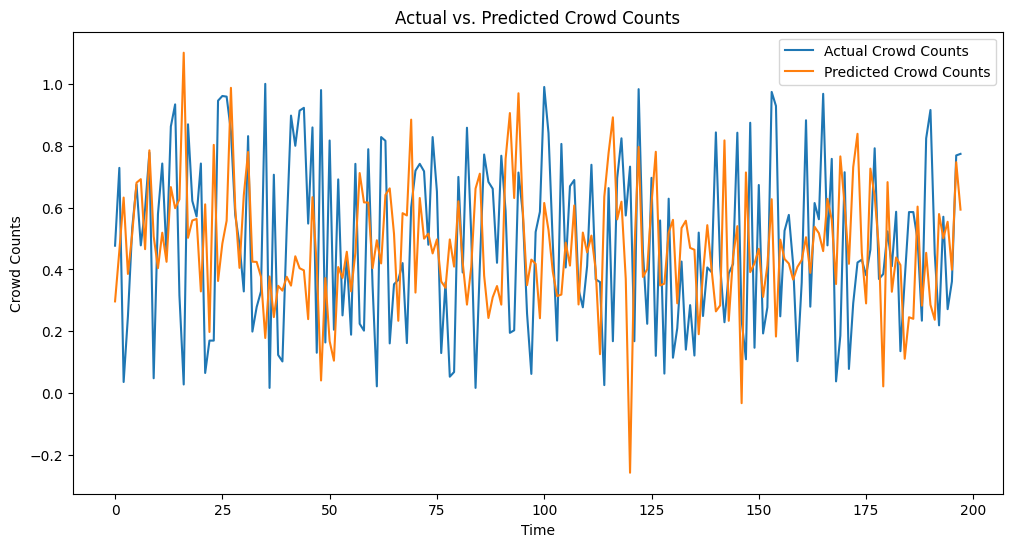

In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('tourist_dataset.csv')

# Feature scaling
scaler = MinMaxScaler()
data[['month', 'crowd_count']] = scaler.fit_transform(data[['month', 'crowd_count']])

# Define the sequence length (number of time steps) and features
sequence_length = 10
n_features = 2  # In this example, using 'month' and 'crowd_count'

# Create sequences for training
sequences = []
target = []
for i in range(len(data) - sequence_length):
    sequences.append(data.iloc[i:i + sequence_length][['month', 'crowd_count']].values)
    target.append(data.iloc[i + sequence_length]['crowd_count'])

X = np.array(sequences)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train an RNN model
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(32, activation='relu', input_shape=(sequence_length, n_features)))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)/10
print(f"Mean Absolute Error: {mae:.6f}")

# Mathematical and Graphical Analysis
print("Statistical Analysis:")
print(data.describe())

# Plotting the actual vs. predicted crowd counts
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Crowd Counts")
plt.plot(y_pred, label="Predicted Crowd Counts")
plt.xlabel("Time")
plt.ylabel("Crowd Counts")
plt.legend()
plt.title("Actual vs. Predicted Crowd Counts")
plt.show()


In [86]:
import pandas as pd
import numpy as np

# Load the dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('tourist_dataset.csv')

# Define a crowd count threshold to classify locations
crowd_threshold = 500

# Create a new column 'crowded' to classify locations
data['crowded'] = np.where(data['crowd_count'] > crowd_threshold, 'crowded', 'not crowded')

# Analyze the classification results
crowded_count = data[data['crowded'] == 'crowded'].shape[0]
not_crowded_count = data[data['crowded'] == 'not crowded'].shape[0]

print("Number of Crowded Locations:", crowded_count)
print("Number of Not Crowded Locations:", not_crowded_count)

# Calculate the percentage of crowded and not crowded locations
percentage_crowded = (crowded_count / len(data)) * 100
percentage_not_crowded = (not_crowded_count / len(data)) * 100

print("Percentage of Crowded Locations:", percentage_crowded, "%")
print("Percentage of Not Crowded Locations:", percentage_not_crowded, "%")


Number of Crowded Locations: 478
Number of Not Crowded Locations: 522
Percentage of Crowded Locations: 47.8 %
Percentage of Not Crowded Locations: 52.2 %


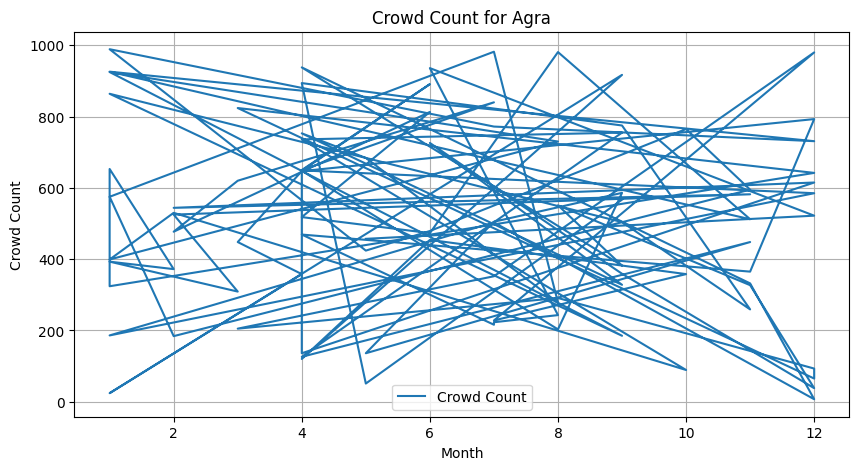

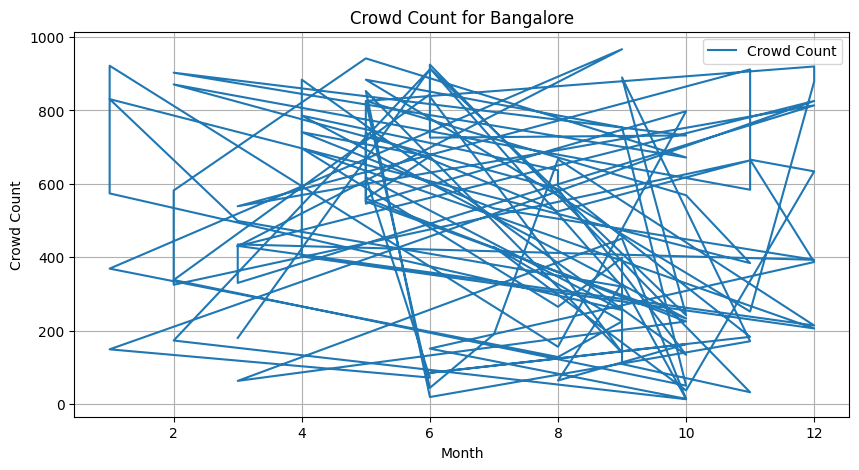

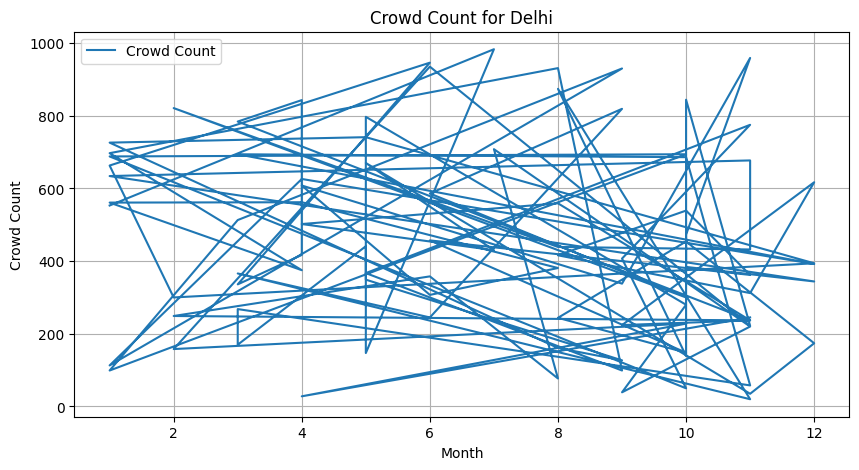

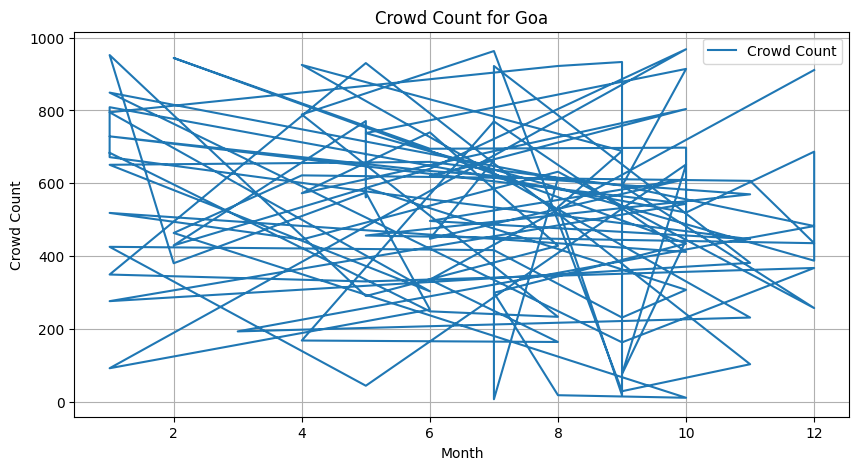

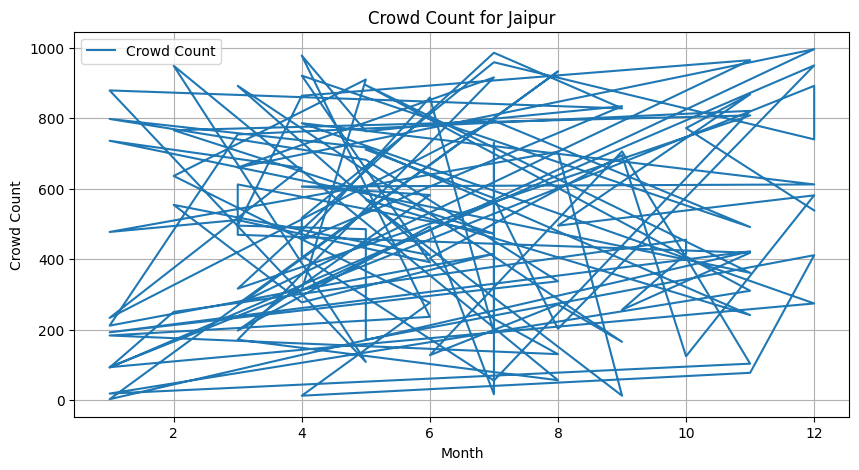

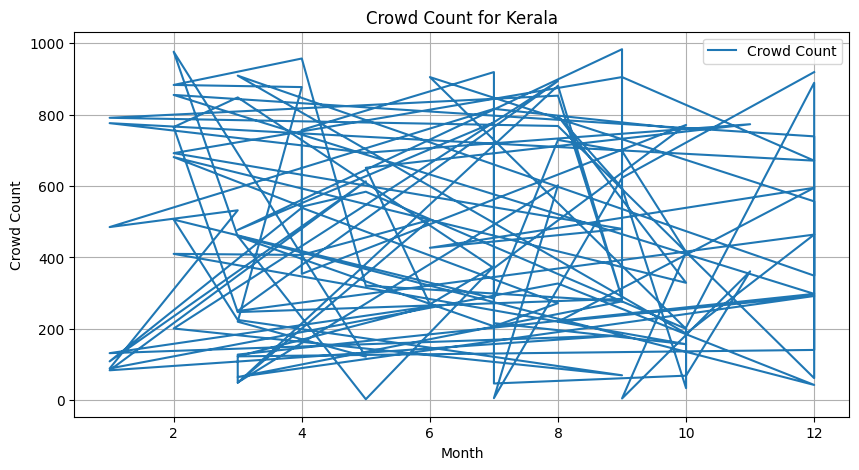

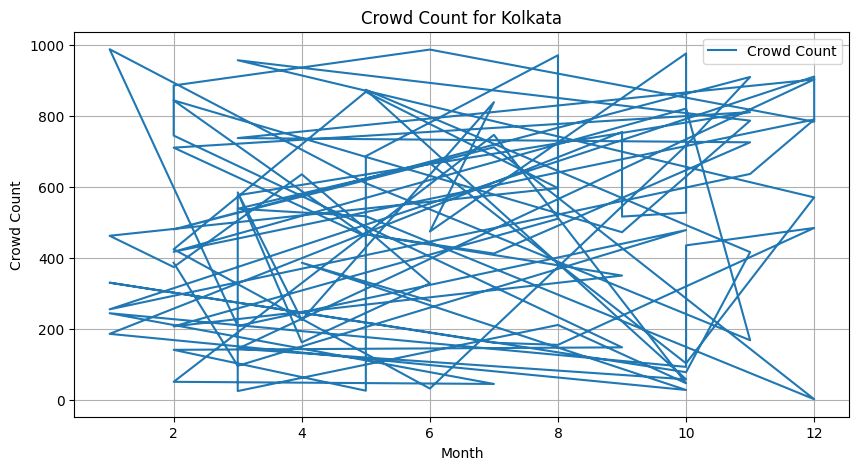

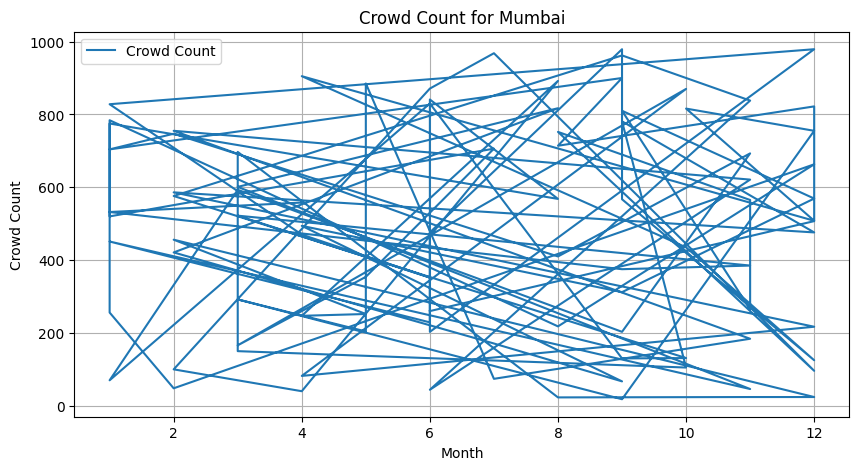

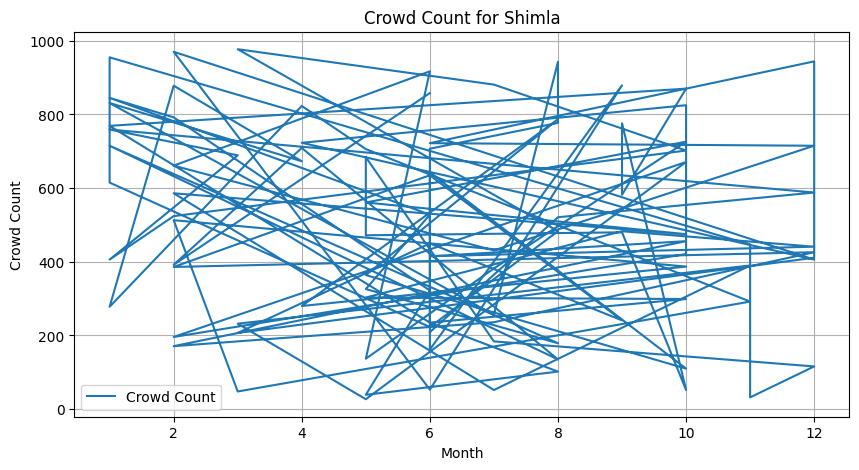

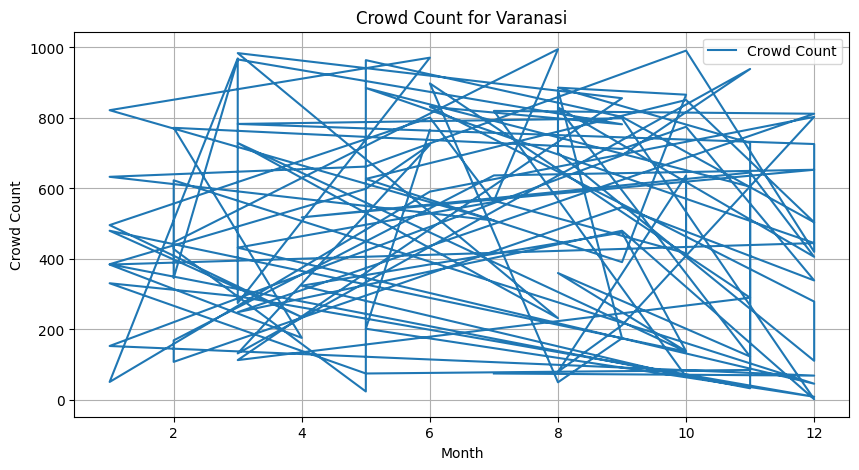

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('tourist_dataset.csv')

# Group the data by tourist location
grouped = data.groupby('tourist_location')

# Create individual plots for each location
for location, group in grouped:
    plt.figure(figsize=(10, 5))
    plt.plot(group['month'], group['crowd_count'], label='Crowd Count')
    plt.xlabel('Month')
    plt.ylabel('Crowd Count')
    plt.title(f'Crowd Count for {location}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [88]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
data = pd.read_csv('tourist_dataset.csv')

# Create a function to check crowd status for a selected location
def check_crowd_status(location):
    crowd_count = data[data['tourist_location'] == location]['crowd_count'].values[0]
    if crowd_count > crowd_threshold:
        status = 'Crowded'
    else:
        status = 'Not Crowded'
    return f"Location: {location}, Crowd Status: {status}"

# Define the crowd threshold
crowd_threshold = 500

# Create a dropdown widget with location options
location_dropdown = widgets.Dropdown(
    options=data['tourist_location'].unique(),
    description='Select Location:',
)

# Create an output widget to display crowd status
output = widgets.Output()

# Define an event handler for location selection
def on_location_dropdown_change(change):
    with output:
        output.clear_output()
        location = change.new
        result = check_crowd_status(location)
        print(result)

# Attach the event handler to the dropdown widget
location_dropdown.observe(on_location_dropdown_change, names='value')

# Display the widgets
display(location_dropdown)
display(output)


Dropdown(description='Select Location:', options=('Jaipur', 'Mumbai', 'Goa', 'Bangalore', 'Shimla', 'Kolkata',…

Output()

In [90]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, Markdown

# Load the dataset (replace 'tourist_dataset.csv' with the path to your dataset)
data = pd.read_csv('tourist_dataset.csv')

# Create a function to check if it's recommended to visit a location
def check_recommendation(location, month, senior_citizens, adults, young_children):
    # Get the data for the specified location and month
    location_data = data[(data['tourist_location'] == location) & (data['month'] == month)]
    
    # Check if data exists for the specified location and month
    if location_data.empty:
        return "Invalid Selection"
    
    # Extract crowd count and population density
    crowd_count = location_data['crowd_count'].values[0]
    population_density = location_data['population_density'].values[0]
    
    # Define criteria for recommendation
    crowd_threshold = 500
    density_threshold = 1000
    
    if crowd_count > crowd_threshold and population_density < density_threshold:
        return "*It is recommended to visit!*"
    else:
        return "**It is not recommended to visit.**"

# Create dropdown widgets for input
location_dropdown = widgets.Dropdown(
    options=data['tourist_location'].unique(),
    description='Select Location:'
)
month_dropdown = widgets.Dropdown(
    options=range(1, 13),
    description='Select Month:'
)
senior_citizens_input = widgets.BoundedIntText(
    min=0, max=100, step=1,
    description='Senior Citizens:'
)
adults_input = widgets.BoundedIntText(
    min=0, max=500, step=1,
    description='Adults:'
)
young_children_input = widgets.BoundedIntText(
    min=0, max=300, step=1,
    description='Young Children:'
)

# Create an output widget to display the recommendation
output = widgets.Output()

# Define an event handler for input changes
def on_input_change(change):
    with output:
        output.clear_output()
        location = location_dropdown.value
        month = month_dropdown.value
        senior_citizens = senior_citizens_input.value
        adults = adults_input.value
        young_children = young_children_input.value
        result = check_recommendation(location, month, senior_citizens, adults, young_children)
        display(Markdown(result))

# Attach the event handler to the input widgets
location_dropdown.observe(on_input_change, names='value')
month_dropdown.observe(on_input_change, names='value')
senior_citizens_input.observe(on_input_change, names='value')
adults_input.observe(on_input_change, names='value')
young_children_input.observe(on_input_change, names='value')

# Display the input widgets and the output
display(location_dropdown, month_dropdown, senior_citizens_input, adults_input, young_children_input)
display(output)


Dropdown(description='Select Location:', options=('Jaipur', 'Mumbai', 'Goa', 'Bangalore', 'Shimla', 'Kolkata',…

Dropdown(description='Select Month:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

BoundedIntText(value=0, description='Senior Citizens:')

BoundedIntText(value=0, description='Adults:', max=500)

BoundedIntText(value=0, description='Young Children:', max=300)

Output()